In [5]:
import pandas as pd 

train_data='/kaggle/input/csvssmd/Server-Machine-Dataset-main/processed_csv/machine-1-1/machine-1-1_train.csv'
test_data='/kaggle/input/csvssmd/Server-Machine-Dataset-main/processed_csv/machine-1-1/machine-1-1_test.csv'

df_train=pd.read_csv(train_data)
df_test=pd.read_csv(test_data)



In [6]:
df_train.head()

,timestamp,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,...,col_28,col_29,col_30,col_31,col_32,col_33,col_34,col_35,col_36,col_37
0,0,0.032258,0.039195,0.027871,0.024390,0.0,0.915385,0.343691,0.0,0.020011,...,0.0,0.004298,0.029993,0.022131,0.0,0.000045,0.034677,0.034747,0.0,0.0
1,1,0.043011,0.048729,0.033445,0.025552,0.0,0.915385,0.344633,0.0,0.019160,...,0.0,0.004298,0.030041,0.028821,0.0,0.000045,0.035763,0.035833,0.0,0.0
2,2,0.043011,0.034958,0.032330,0.025552,0.0,0.915385,0.344633,0.0,0.020011,...,0.0,0.004298,0.026248,0.021101,0.0,0.000045,0.033012,0.033082,0.0,0.0
3,3,0.032258,0.028602,0.030100,0.024390,0.0,0.912821,0.342750,0.0,0.021289,...,0.0,0.004298,0.030169,0.025733,0.0,0.000022,0.035112,0.035182,0.0,0.0
4,4,0.032258,0.019068,0.026756,0.023229,0.0,0.912821,0.342750,0.0,0.018734,...,0.0,0.004298,0.027240,0.022645,0.0,0.000034,0.033447,0.033517,0.0,0.0


**Revert to the original column names**

In [7]:
new_column_names = [
    'cpu_r', 'load_1', 'load_5', 'load_15', 'mem_shmem', 'mem_u', 'mem_u_e', 'total_mem',
    'disk_q', 'disk_r', 'disk_rb', 'disk_svc', 'disk_u', 'disk_w', 'disk_wa', 'disk_wb',
    'si', 'so', 'eth1_fi', 'eth1_fo', 'eth1_pi', 'eth1_po', 'tcp_tw', 'tcp_use',
    'active_opens', 'curr_estab', 'in_errs', 'in_segs', 'listen_overflows', 'out_rsts',
    'out_segs', 'passive_opens', 'retransegs', 'tcp_timeouts', 'udp_in_dg', 'udp_out_dg',
    'udp_rcv_buf_errs', 'udp_snd_buf_errs'
]

In [8]:
df_train.shape

(28479, 39)

In [9]:
df_test.head()

,timestamp,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,...,col_29,col_30,col_31,col_32,col_33,col_34,col_35,col_36,col_37,label
0,0,0.075269,0.065678,0.070234,0.074332,0.0,0.933333,0.274011,0.0,0.031081,...,0.008596,0.068036,0.048893,0.000386,0.000034,0.064432,0.064500,0.0,0.0,0.0
1,1,0.086022,0.080508,0.075808,0.076655,0.0,0.930769,0.274953,0.0,0.031081,...,0.008596,0.070020,0.050437,0.000386,0.000022,0.065228,0.065224,0.0,0.0,0.0
2,2,0.075269,0.064619,0.071349,0.074332,0.0,0.928205,0.274953,0.0,0.030940,...,0.008596,0.069684,0.055069,0.000386,0.000045,0.067111,0.067178,0.0,0.0,0.0
3,3,0.086022,0.048729,0.063545,0.070848,0.0,0.928205,0.273070,0.0,0.027250,...,0.010029,0.073253,0.051467,0.000000,0.000034,0.066676,0.066744,0.0,0.0,0.0
4,4,0.086022,0.051907,0.062430,0.070848,0.0,0.933333,0.274011,0.0,0.030940,...,0.008596,0.070932,0.051467,0.000386,0.000022,0.066604,0.066671,0.0,0.0,0.0


we have  25785 normal points with  2694 anomalies

In [10]:
df_test['label'].value_counts()

label
0.0    25785
1.0     2694
Name: count, dtype: int64

In [11]:
# dict to rename columns
rename_dict = {f'col_{i}': new_column_names[i] for i in range(len(new_column_names))}
df_train.rename(columns=rename_dict, inplace=True)
df_test.rename(columns=rename_dict, inplace=True)

In [12]:
#verify 
print("df train : ")
print(df_train.columns)
print("df test :")
print(df_test.columns)

df train : 
Index(['timestamp', 'cpu_r', 'load_1', 'load_5', 'load_15', 'mem_shmem',
       'mem_u', 'mem_u_e', 'total_mem', 'disk_q', 'disk_r', 'disk_rb',
       'disk_svc', 'disk_u', 'disk_w', 'disk_wa', 'disk_wb', 'si', 'so',
       'eth1_fi', 'eth1_fo', 'eth1_pi', 'eth1_po', 'tcp_tw', 'tcp_use',
       'active_opens', 'curr_estab', 'in_errs', 'in_segs', 'listen_overflows',
       'out_rsts', 'out_segs', 'passive_opens', 'retransegs', 'tcp_timeouts',
       'udp_in_dg', 'udp_out_dg', 'udp_rcv_buf_errs', 'udp_snd_buf_errs'],
      dtype='object')
df test :
Index(['timestamp', 'cpu_r', 'load_1', 'load_5', 'load_15', 'mem_shmem',
       'mem_u', 'mem_u_e', 'total_mem', 'disk_q', 'disk_r', 'disk_rb',
       'disk_svc', 'disk_u', 'disk_w', 'disk_wa', 'disk_wb', 'si', 'so',
       'eth1_fi', 'eth1_fo', 'eth1_pi', 'eth1_po', 'tcp_tw', 'tcp_use',
       'active_opens', 'curr_estab', 'in_errs', 'in_segs', 'listen_overflows',
       'out_rsts', 'out_segs', 'passive_opens', 'retransegs', 'tcp_

In [13]:
df_train.head()

,timestamp,cpu_r,load_1,load_5,load_15,mem_shmem,mem_u,mem_u_e,total_mem,disk_q,...,listen_overflows,out_rsts,out_segs,passive_opens,retransegs,tcp_timeouts,udp_in_dg,udp_out_dg,udp_rcv_buf_errs,udp_snd_buf_errs
0,0,0.032258,0.039195,0.027871,0.024390,0.0,0.915385,0.343691,0.0,0.020011,...,0.0,0.004298,0.029993,0.022131,0.0,0.000045,0.034677,0.034747,0.0,0.0
1,1,0.043011,0.048729,0.033445,0.025552,0.0,0.915385,0.344633,0.0,0.019160,...,0.0,0.004298,0.030041,0.028821,0.0,0.000045,0.035763,0.035833,0.0,0.0
2,2,0.043011,0.034958,0.032330,0.025552,0.0,0.915385,0.344633,0.0,0.020011,...,0.0,0.004298,0.026248,0.021101,0.0,0.000045,0.033012,0.033082,0.0,0.0
3,3,0.032258,0.028602,0.030100,0.024390,0.0,0.912821,0.342750,0.0,0.021289,...,0.0,0.004298,0.030169,0.025733,0.0,0.000022,0.035112,0.035182,0.0,0.0
4,4,0.032258,0.019068,0.026756,0.023229,0.0,0.912821,0.342750,0.0,0.018734,...,0.0,0.004298,0.027240,0.022645,0.0,0.000034,0.033447,0.033517,0.0,0.0


In [14]:
df_test.head()

,timestamp,cpu_r,load_1,load_5,load_15,mem_shmem,mem_u,mem_u_e,total_mem,disk_q,...,out_rsts,out_segs,passive_opens,retransegs,tcp_timeouts,udp_in_dg,udp_out_dg,udp_rcv_buf_errs,udp_snd_buf_errs,label
0,0,0.075269,0.065678,0.070234,0.074332,0.0,0.933333,0.274011,0.0,0.031081,...,0.008596,0.068036,0.048893,0.000386,0.000034,0.064432,0.064500,0.0,0.0,0.0
1,1,0.086022,0.080508,0.075808,0.076655,0.0,0.930769,0.274953,0.0,0.031081,...,0.008596,0.070020,0.050437,0.000386,0.000022,0.065228,0.065224,0.0,0.0,0.0
2,2,0.075269,0.064619,0.071349,0.074332,0.0,0.928205,0.274953,0.0,0.030940,...,0.008596,0.069684,0.055069,0.000386,0.000045,0.067111,0.067178,0.0,0.0,0.0
3,3,0.086022,0.048729,0.063545,0.070848,0.0,0.928205,0.273070,0.0,0.027250,...,0.010029,0.073253,0.051467,0.000000,0.000034,0.066676,0.066744,0.0,0.0,0.0
4,4,0.086022,0.051907,0.062430,0.070848,0.0,0.933333,0.274011,0.0,0.030940,...,0.008596,0.070932,0.051467,0.000386,0.000022,0.066604,0.066671,0.0,0.0,0.0


In [15]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28479 entries, 0 to 28478
Data columns (total 39 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   timestamp         28479 non-null  int64  
 1   cpu_r             28479 non-null  float64
 2   load_1            28479 non-null  float64
 3   load_5            28479 non-null  float64
 4   load_15           28479 non-null  float64
 5   mem_shmem         28479 non-null  float64
 6   mem_u             28479 non-null  float64
 7   mem_u_e           28479 non-null  float64
 8   total_mem         28479 non-null  float64
 9   disk_q            28479 non-null  float64
 10  disk_r            28479 non-null  float64
 11  disk_rb           28479 non-null  float64
 12  disk_svc          28479 non-null  float64
 13  disk_u            28479 non-null  float64
 14  disk_w            28479 non-null  float64
 15  disk_wa           28479 non-null  float64
 16  disk_wb           28479 non-null  float6

**columns description**

**CPU Rate** Percentage of CPU utilization, indicating the current processing load on the server. High values may signal overuse or performance issues.


**Load Average (1 min)**  Average number of processes waiting to be executed over the past 1 minute. Reflects immediate system load.


**Load Average (5 min)** Average number of processes over the past 5 minutes. Provides a smoothed view of system load.


**Memory Usage** Amount or percentage of memory being used. High usage may lead to slowdowns or system crashes.


**Disk Queue Length** Number of pending disk I/O operations. A spike may indicate disk congestion or performance bottlenecks.

**Disk Read Rate** Rate at which data is read from the disk (in bytes or blocks per second). Useful to detect intensive read operations.

**Disk Write Rate** Rate at which data is written to disk. High values might signal unusual or heavy write operations.

**Disk Usage** Percentage of disk space used. Full disks can lead to system errors or logging issues.

**Network Input (eth1)** Incoming network traffic through interface eth1. Can indicate network activity or potential attacks like DDoS.

**Network Output (eth1)**  Outgoing network traffic via eth1. Helps monitor server’s external communication.

**TCP Timeouts** Number of TCP connection timeouts. Often signals network latency, overload, or application-level problems.

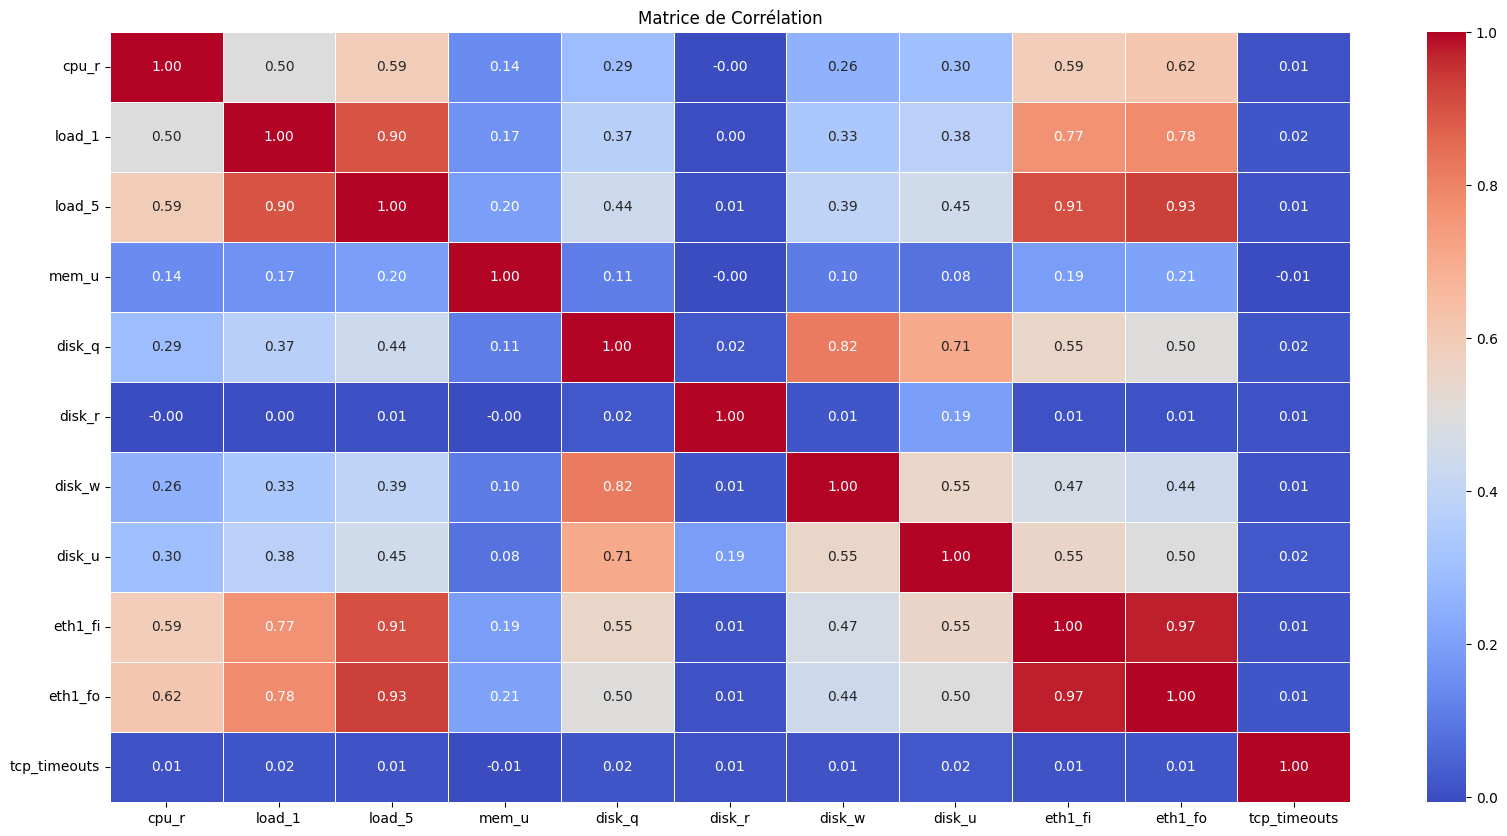

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
correlation_matrix = df_train[[
     'cpu_r', 'load_1', 'load_5', 'mem_u','disk_q', 'disk_r', 'disk_w', 'disk_u', 'eth1_fi', 'eth1_fo','tcp_timeouts'
]].corr()
plt.figure(figsize=(20, 10)) 
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Matrice de Corrélation")
plt.show()

In [17]:
# columns to conserve 
priority_columns = [
    'timestamp', 'cpu_r', 'load_1', 'load_5', 'mem_u', 
    'disk_q', 'disk_r', 'disk_w', 'disk_u', 'eth1_fi', 'eth1_fo','tcp_timeouts'
]

priority_columns_test = priority_columns + ['label']

missing_train = [col for col in priority_columns if col not in df_train.columns]
missing_test = [col for col in priority_columns_test if col not in df_test.columns]
if missing_train:
    raise ValueError(f"missing columns df_train : {missing_train}")
if missing_test:
    raise ValueError(f"missing columns df_test : {missing_test}")

df_train = df_train[priority_columns]
df_test = df_test[priority_columns_test]

In [18]:
print("columns df train :")
print(df_train.columns)
print("columns df test :")
print(df_test.columns)

columns df train :
Index(['timestamp', 'cpu_r', 'load_1', 'load_5', 'mem_u', 'disk_q', 'disk_r',
       'disk_w', 'disk_u', 'eth1_fi', 'eth1_fo', 'tcp_timeouts'],
      dtype='object')
columns df test :
Index(['timestamp', 'cpu_r', 'load_1', 'load_5', 'mem_u', 'disk_q', 'disk_r',
       'disk_w', 'disk_u', 'eth1_fi', 'eth1_fo', 'tcp_timeouts', 'label'],
      dtype='object')


In [19]:
print("df_train :")
df_train.head()


df_train :


,timestamp,cpu_r,load_1,load_5,mem_u,disk_q,disk_r,disk_w,disk_u,eth1_fi,eth1_fo,tcp_timeouts
0,0,0.032258,0.039195,0.027871,0.915385,0.020011,0.000122,0.060266,0.027397,0.062195,0.041221,0.000045
1,1,0.043011,0.048729,0.033445,0.915385,0.019160,0.001722,0.054029,0.027397,0.051131,0.036651,0.000045
2,2,0.043011,0.034958,0.032330,0.915385,0.020011,0.000122,0.057157,0.027397,0.047139,0.035940,0.000045
3,3,0.032258,0.028602,0.030100,0.912821,0.021289,0.000000,0.058962,0.013699,0.055012,0.038168,0.000022
4,4,0.032258,0.019068,0.026756,0.912821,0.018734,0.000000,0.047945,0.013699,0.050170,0.037274,0.000034


In [20]:
print("df_test :")
df_test.head()

df_test :


,timestamp,cpu_r,load_1,load_5,mem_u,disk_q,disk_r,disk_w,disk_u,eth1_fi,eth1_fo,tcp_timeouts,label
0,0,0.075269,0.065678,0.070234,0.933333,0.031081,0.000000,0.067808,0.027397,0.121988,0.091978,0.000034,0.0
1,1,0.086022,0.080508,0.075808,0.930769,0.031081,0.000122,0.071395,0.054795,0.121396,0.094162,0.000022,0.0
2,2,0.075269,0.064619,0.071349,0.928205,0.030940,0.000366,0.063277,0.027397,0.115384,0.090118,0.000045,0.0
3,3,0.086022,0.048729,0.063545,0.928205,0.027250,0.000244,0.067841,0.027397,0.135121,0.097381,0.000034,0.0
4,4,0.086022,0.051907,0.062430,0.933333,0.030940,0.000244,0.075654,0.041096,0.127359,0.094495,0.000022,0.0


In [21]:
import pandas as pd

# save df_train
df_train.to_csv('machine-1-1_train_filtered.csv', index=False)


#save  df_test
df_test.to_csv('machine-1-1_test_filtered.csv', index=False)


In [22]:
df_train.shape

(28479, 12)

In [23]:
df_test.shape

(28479, 13)

In [24]:
df_test['label'].value_counts()

label
0.0    25785
1.0     2694
Name: count, dtype: int64

# Analyze anomaly intervals

Label distribution:
label
0.0    25785
1.0     2694
Name: count, dtype: int64


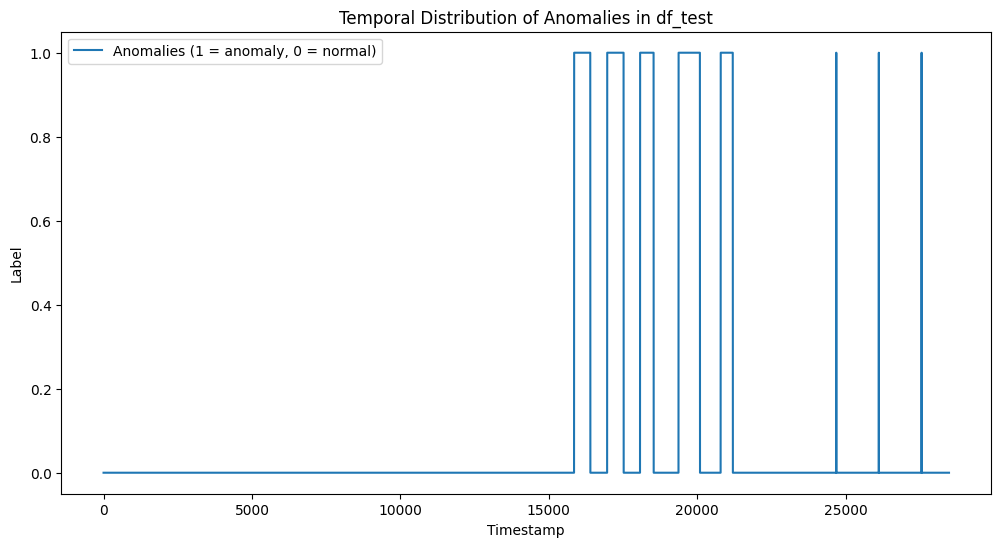

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the filtered test dataset
test_data = 'machine-1-1_test_filtered.csv'
df_test = pd.read_csv(test_data)

# Check the distribution of anomaly labels (0 = normal, 1 = anomaly)
print("Label distribution:")
print(df_test['label'].value_counts())

# Visualize the temporal distribution of anomalies
plt.figure(figsize=(12, 6))
plt.plot(df_test['timestamp'], df_test['label'], label='Anomalies (1 = anomaly, 0 = normal)')
plt.xlabel('Timestamp')
plt.ylabel('Label')
plt.title('Temporal Distribution of Anomalies in df_test')
plt.legend()
plt.show()



In [22]:
# Analyze anomalies over time intervals (e.g., every 1000 timestamps)
bins = range(0, df_test['timestamp'].max() + 1000, 1000)
df_test['time_bin'] = pd.cut(df_test['timestamp'], bins=bins)

# Count the number of anomalies within each interval
anomaly_counts = df_test.groupby('time_bin')['label'].sum()

print("\nNumber of anomalies per 1000-timestamp interval:")
print(anomaly_counts)



Number of anomalies per 1000-timestamp interval:
time_bin
(0, 1000]           0.0
(1000, 2000]        0.0
(2000, 3000]        0.0
(3000, 4000]        0.0
(4000, 5000]        0.0
(5000, 6000]        0.0
(6000, 7000]        0.0
(7000, 8000]        0.0
(8000, 9000]        0.0
(9000, 10000]       0.0
(10000, 11000]      0.0
(11000, 12000]      0.0
(12000, 13000]      0.0
(13000, 14000]      0.0
(14000, 15000]      0.0
(15000, 16000]    152.0
(16000, 17000]    432.0
(17000, 18000]    516.0
(18000, 19000]    457.0
(19000, 20000]    634.0
(20000, 21000]    302.0
(21000, 22000]    194.0
(22000, 23000]      0.0
(23000, 24000]      0.0
(24000, 25000]      3.0
(25000, 26000]      0.0
(26000, 27000]      2.0
(27000, 28000]      2.0
(28000, 29000]      0.0
Name: label, dtype: float64


/tmp/ipykernel_36/1168435984.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  anomaly_counts = df_test.groupby('time_bin')['label'].sum()


anomalies are in 15000-22000

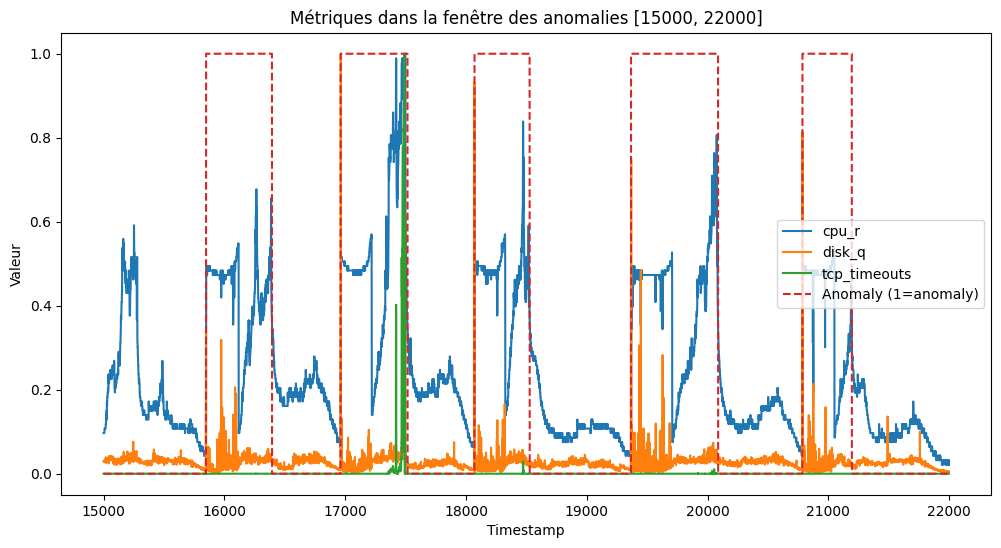

In [23]:
anomaly_window = df_test[(df_test['timestamp'] >= 15000) & (df_test['timestamp'] < 22000)]

plt.figure(figsize=(12, 6))
plt.plot(anomaly_window['timestamp'], anomaly_window['cpu_r'], label='cpu_r')
plt.plot(anomaly_window['timestamp'], anomaly_window['disk_q'], label='disk_q')
plt.plot(anomaly_window['timestamp'], anomaly_window['tcp_timeouts'], label='tcp_timeouts')
plt.plot(anomaly_window['timestamp'], anomaly_window['label'], label='Anomaly (1=anomaly)', linestyle='--')
plt.xlabel('Timestamp')
plt.ylabel('Valeur')
plt.title('Métriques dans la fenêtre des anomalies [15000, 22000]')
plt.legend()
plt.show()

# classic and Simple unsupervised model

In [24]:
import numpy as np
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
import seaborn as sns

## isolation forest with grid search

In [25]:
from sklearn.ensemble import IsolationForest

features = [ 'cpu_r', 'load_1', 'load_5', 'mem_u',
    'disk_q', 'disk_r', 'disk_w', 'disk_u', 'eth1_fi', 'eth1_fo', 'tcp_timeouts']
X_train = df_train[features]
X_test = df_test[features]



In [26]:
# Define a range of contamination values to test (from 0.01 to 0.15, step 0.01)
contamination_values = np.arange(0.01, 0.16, 0.01)

# List to store evaluation results for each contamination value
results = []

# Grid Search over contamination values
for contamination in contamination_values:
    # Initialize the Isolation Forest model
    model = IsolationForest(contamination=contamination, random_state=42)
    
    # Fit the model on the training data
    model.fit(X_train)
    
    # Predict anomalies on the test set
    df_test['anomaly_pred'] = model.predict(X_test)
    
    # Map predictions: 1 (normal) → 0, -1 (anomaly) → 1
    df_test['anomaly_pred'] = df_test['anomaly_pred'].map({1: 0, -1: 1})
    
    # Compute evaluation metrics
    precision = precision_score(df_test['label'], df_test['anomaly_pred'], zero_division=0)
    recall = recall_score(df_test['label'], df_test['anomaly_pred'])
    f1 = f1_score(df_test['label'], df_test['anomaly_pred'])
    
    # Store the results
    results.append({
        'contamination': contamination,
        'precision': precision,
        'recall': recall,
        'f1_score': f1
    })

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names,

In [27]:
# Convert results into a DataFrame for easier analysis
results_df = pd.DataFrame(results)

# Display rounded evaluation metrics
print("Grid Search Results:")
print(results_df.round(4))



Grid Search Results:
    contamination  precision  recall  f1_score
0            0.01     0.3785  0.5546    0.4499
1            0.02     0.3466  0.7108    0.4660
2            0.03     0.3268  0.7814    0.4608
3            0.04     0.3090  0.8307    0.4504
4            0.05     0.2916  0.8601    0.4356
5            0.06     0.2796  0.8838    0.4248
6            0.07     0.2691  0.9076    0.4151
7            0.08     0.2585  0.9276    0.4043
8            0.09     0.2487  0.9391    0.3933
9            0.10     0.2394  0.9495    0.3823
10           0.11     0.2307  0.9614    0.3720
11           0.12     0.2228  0.9677    0.3622
12           0.13     0.2149  0.9718    0.3519
13           0.14     0.2086  0.9748    0.3436
14           0.15     0.2020  0.9770    0.3348


In [28]:
# Identify the contamination value that gives the highest F1 score
best_result = results_df.loc[results_df['f1_score'].idxmax()]
best_contamination = best_result['contamination']
print(f"\nBest contamination: {best_contamination:.4f}")
print(f"Precision: {best_result['precision']:.4f}")
print(f"Recall: {best_result['recall']:.4f}")
print(f"F1-score: {best_result['f1_score']:.4f}")



Best contamination: 0.0200
Precision: 0.3466
Recall: 0.7108
F1-score: 0.4660


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(



Confusion Matrix for the Best Contamination Value:
[[22175  3610]
 [  779  1915]]

Interpretation:
True Negatives (normal predicted as normal): 22175
False Positives (normal predicted as anomaly): 3610
False Negatives (anomaly predicted as normal): 779
True Positives (anomaly predicted as anomaly): 1915


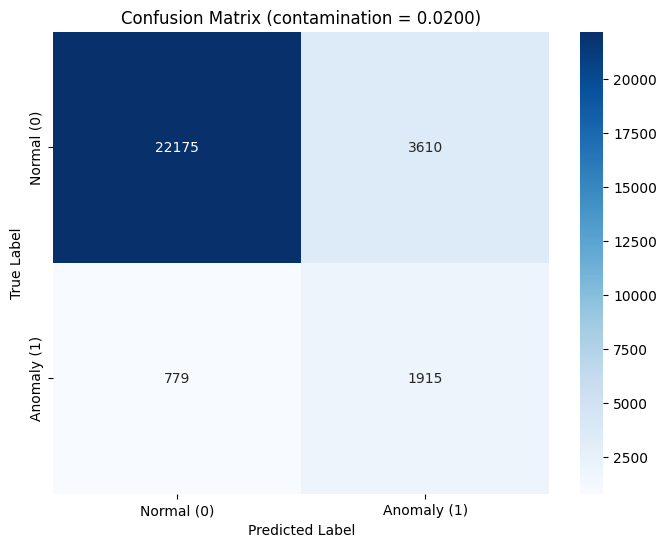

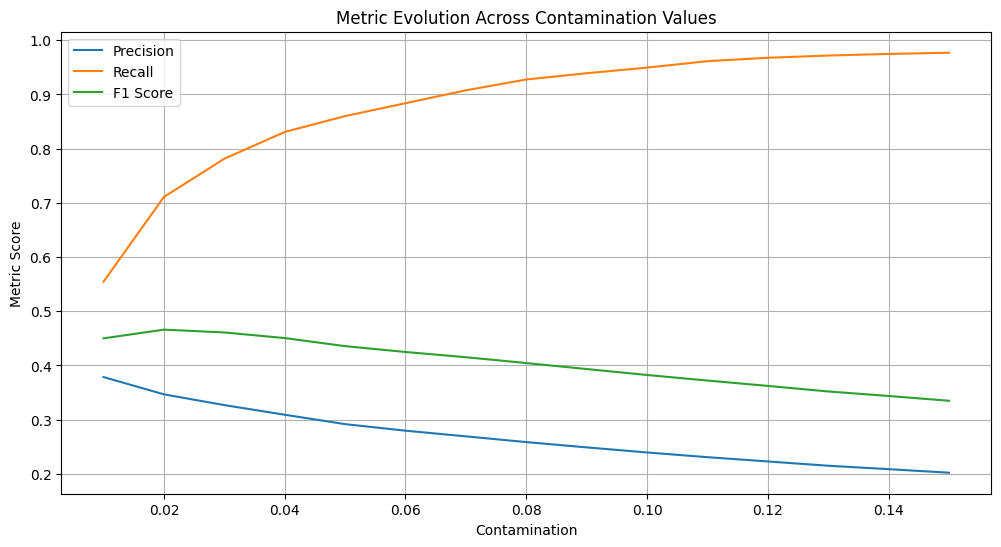

In [29]:
# Generate confusion matrix for the best model
model = IsolationForest(contamination=best_contamination, random_state=42)
model.fit(X_train)
df_test['anomaly_pred'] = model.predict(X_test)
df_test['anomaly_pred'] = df_test['anomaly_pred'].map({1: 0, -1: 1})

cm = confusion_matrix(df_test['label'], df_test['anomaly_pred'])

print("\nConfusion Matrix for the Best Contamination Value:")
print(cm)
print("\nInterpretation:")
print(f"True Negatives (normal predicted as normal): {cm[0, 0]}")
print(f"False Positives (normal predicted as anomaly): {cm[0, 1]}")
print(f"False Negatives (anomaly predicted as normal): {cm[1, 0]}")
print(f"True Positives (anomaly predicted as anomaly): {cm[1, 1]}")

# Visualize the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Normal (0)', 'Anomaly (1)'],
            yticklabels=['Normal (0)', 'Anomaly (1)'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title(f'Confusion Matrix (contamination = {best_contamination:.4f})')
plt.show()

# Plot the evolution of precision, recall, and F1 score across contamination values
plt.figure(figsize=(12, 6))
plt.plot(results_df['contamination'], results_df['precision'], label='Precision')
plt.plot(results_df['contamination'], results_df['recall'], label='Recall')
plt.plot(results_df['contamination'], results_df['f1_score'], label='F1 Score')
plt.xlabel('Contamination')
plt.ylabel('Metric Score')
plt.title('Metric Evolution Across Contamination Values')
plt.legend()
plt.grid(True)
plt.show()


## Z score

In [30]:
# Calculate Z-scores for each feature (standard score)
z_scores = np.abs((df_test[features] - df_test[features].mean()) / df_test[features].std())

# Define a range of threshold values to test (from 1.0 to 5.0 with a step of 0.1)
threshold_values = np.arange(1.0, 5.1, 0.1)

# List to store evaluation metrics for each threshold
results = []

# Grid Search over different Z-score thresholds
for threshold in threshold_values:
    # Predict anomalies: if any feature exceeds the threshold, mark as anomaly (1), else normal (0)
    df_test['Zscore_pred'] = (z_scores > threshold).any(axis=1).astype(int)
    
    # Compute evaluation metrics
    precision = precision_score(df_test['label'], df_test['Zscore_pred'], zero_division=0)
    recall = recall_score(df_test['label'], df_test['Zscore_pred'])
    f1 = f1_score(df_test['label'], df_test['Zscore_pred'])
    
    # Store results for this threshold
    results.append({
        'threshold': threshold,
        'precision': precision,
        'recall': recall,
        'f1_score': f1
    })


In [31]:
# Convert the results list into a DataFrame
results_df = pd.DataFrame(results)

# Display the Grid Search results for Z-score thresholds
print("Grid Search Results (Z-score):")
print(results_df.round(4))

# Identify the best threshold based on highest F1 score
best_result = results_df.loc[results_df['f1_score'].idxmax()]
best_threshold = best_result['threshold']
print(f"\nBest threshold: {best_threshold:.4f}")
print(f"Precision: {best_result['precision']:.4f}")
print(f"Recall: {best_result['recall']:.4f}")
print(f"F1-score: {best_result['f1_score']:.4f}")

Grid Search Results (Z-score):
    threshold  precision  recall  f1_score
0         1.0     0.1842  0.9365    0.3078
1         1.1     0.2330  0.9280    0.3725
2         1.2     0.2957  0.9209    0.4476
3         1.3     0.3402  0.9131    0.4957
4         1.4     0.3807  0.9005    0.5352
5         1.5     0.4084  0.8898    0.5599
6         1.6     0.4307  0.8816    0.5787
7         1.7     0.4506  0.8701    0.5937
8         1.8     0.4693  0.8589    0.6070
9         1.9     0.4907  0.8478    0.6216
10        2.0     0.5214  0.8352    0.6420
11        2.1     0.5638  0.8215    0.6687
12        2.2     0.5943  0.8129    0.6866
13        2.3     0.6234  0.7999    0.7007
14        2.4     0.6472  0.7866    0.7101
15        2.5     0.5590  0.4733    0.5126
16        2.6     0.5411  0.4053    0.4635
17        2.7     0.5435  0.3641    0.4361
18        2.8     0.6159  0.3215    0.4224
19        2.9     0.6234  0.3010    0.4060
20        3.0     0.6439  0.2832    0.3934
21        3.1     0.661


Confusion Matrix for Best Threshold:
[[24630  1155]
 [  575  2119]]

Interpretation:
True Negatives (normal predicted as normal): 24630
False Positives (normal predicted as anomaly): 1155
False Negatives (anomaly predicted as normal): 575
True Positives (anomaly predicted as anomaly): 2119


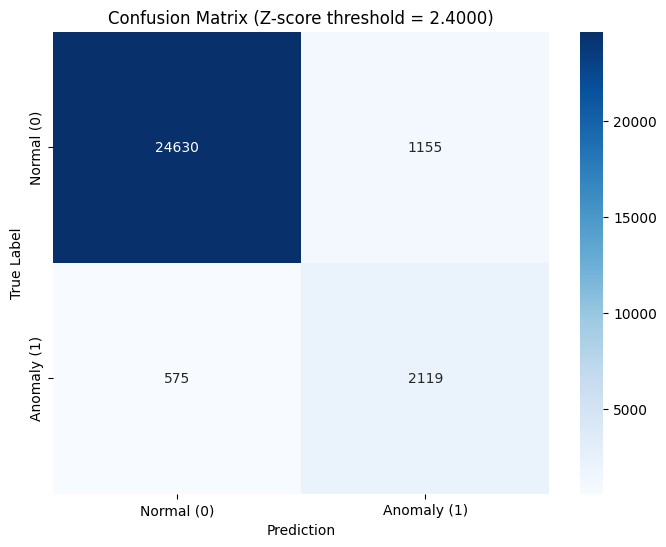

In [32]:
# Generate confusion matrix using the best threshold
df_test['Zscore_pred'] = (z_scores > best_threshold).any(axis=1).astype(int)
cm = confusion_matrix(df_test['label'], df_test['Zscore_pred'])

print("\nConfusion Matrix for Best Threshold:")
print(cm)
print("\nInterpretation:")
print(f"True Negatives (normal predicted as normal): {cm[0, 0]}")
print(f"False Positives (normal predicted as anomaly): {cm[0, 1]}")
print(f"False Negatives (anomaly predicted as normal): {cm[1, 0]}")
print(f"True Positives (anomaly predicted as anomaly): {cm[1, 1]}")

# Visualize the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Normal (0)', 'Anomaly (1)'],
            yticklabels=['Normal (0)', 'Anomaly (1)'])
plt.xlabel('Prediction')
plt.ylabel('True Label')
plt.title(f'Confusion Matrix (Z-score threshold = {best_threshold:.4f})')
plt.show()


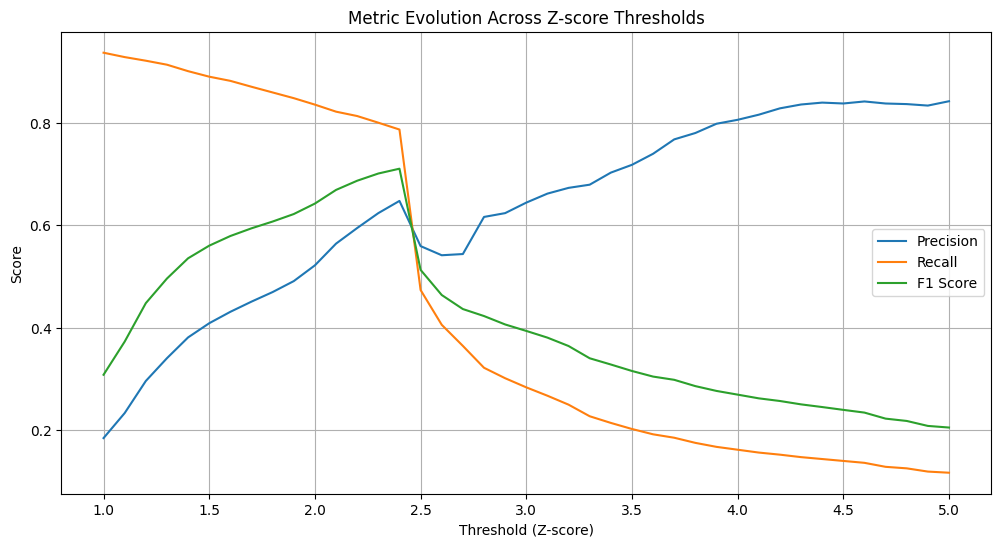

In [33]:
# Plot the evolution of precision, recall, and F1 score over different thresholds
plt.figure(figsize=(12, 6))
plt.plot(results_df['threshold'], results_df['precision'], label='Precision')
plt.plot(results_df['threshold'], results_df['recall'], label='Recall')
plt.plot(results_df['threshold'], results_df['f1_score'], label='F1 Score')
plt.xlabel('Threshold (Z-score)')
plt.ylabel('Score')
plt.title('Metric Evolution Across Z-score Thresholds')
plt.legend()
plt.grid(True)
plt.show()


## Z score Robust with MAD

In [34]:
# Calculate the median and MAD (Median Absolute Deviation) for each feature
median = df_test[features].median()
mad = df_test[features].apply(lambda x: np.median(np.abs(x - np.median(x))))
c = 1.4826  # Normalization constant for MAD (approximate for normal distribution)
mad[mad == 0] = np.finfo(float).eps  # Replace zeros to avoid division by zero

# Calculate robust Z-scores using median and MAD
z_robust = df_test[features].apply(lambda x: np.abs(x - median[x.name]) / (c * mad[x.name]))

# Define the range of thresholds to test
threshold_values = np.arange(1.0, 10.1, 0.5)  # From 1.0 to 10.0 in steps of 0.5

# Initialize a list to store evaluation results
results = []

# Perform grid search over threshold values
for threshold in threshold_values:
    # Detect anomalies: flag samples where any feature's robust Z-score exceeds the threshold
    df_test['z_robust'] = (z_robust > threshold).any(axis=1).astype(int)
    
    # Calculate evaluation metrics
    precision = precision_score(df_test['label'], df_test['z_robust'], zero_division=0)
    recall = recall_score(df_test['label'], df_test['z_robust'])
    f1 = f1_score(df_test['label'], df_test['z_robust'])
    
    # Append the metrics for the current threshold
    results.append({
        'threshold': threshold,
        'precision': precision,
        'recall': recall,
        'f1_score': f1
    })

# Convert results list into a DataFrame for easier analysis
results_df = pd.DataFrame(results)

In [35]:

# Display the grid search results for robust Z-score thresholds
print("Grid Search Results (Robust Z-score with MAD):")
print(results_df.round(4))

# Identify the best threshold based on highest F1 score
best_result = results_df.loc[results_df['f1_score'].idxmax()]
best_threshold = best_result['threshold']
print(f"\nBest threshold: {best_threshold:.4f}")
print(f"Precision: {best_result['precision']:.4f}")
print(f"Recall: {best_result['recall']:.4f}")
print(f"F1-score: {best_result['f1_score']:.4f}")

Grid Search Results (Robust Z-score with MAD):
    threshold  precision  recall  f1_score
0         1.0     0.1163  0.9881    0.2082
1         1.5     0.1934  0.9640    0.3222
2         2.0     0.2732  0.9384    0.4232
3         2.5     0.3436  0.9169    0.4998
4         3.0     0.3991  0.8983    0.5526
5         3.5     0.4381  0.8697    0.5827
6         4.0     0.4752  0.8374    0.6064
7         4.5     0.5259  0.8088    0.6374
8         5.0     0.5808  0.7721    0.6629
9         5.5     0.6455  0.7509    0.6942
10        6.0     0.6673  0.6463    0.6566
11        6.5     0.6516  0.4993    0.5654
12        7.0     0.6737  0.4629    0.5487
13        7.5     0.6814  0.4191    0.5190
14        8.0     0.6901  0.3942    0.5018
15        8.5     0.7037  0.3808    0.4942
16        9.0     0.7131  0.3690    0.4863
17        9.5     0.7124  0.3586    0.4770
18       10.0     0.7131  0.3460    0.4659

Best threshold: 5.5000
Precision: 0.6455
Recall: 0.7509
F1-score: 0.6942



Confusion Matrix for Best Threshold:
[[24674  1111]
 [  671  2023]]

Interpretation:
True Negatives (normal predicted as normal): 24674
False Positives (normal predicted as anomaly): 1111
False Negatives (anomaly predicted as normal): 671
True Positives (anomaly predicted as anomaly): 2023


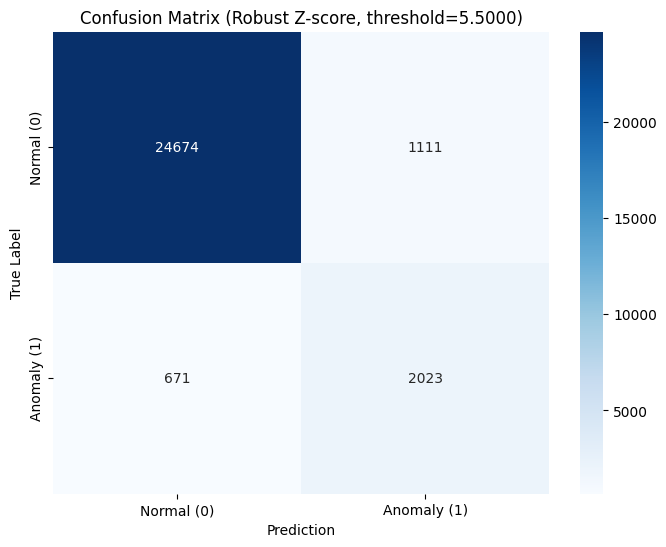

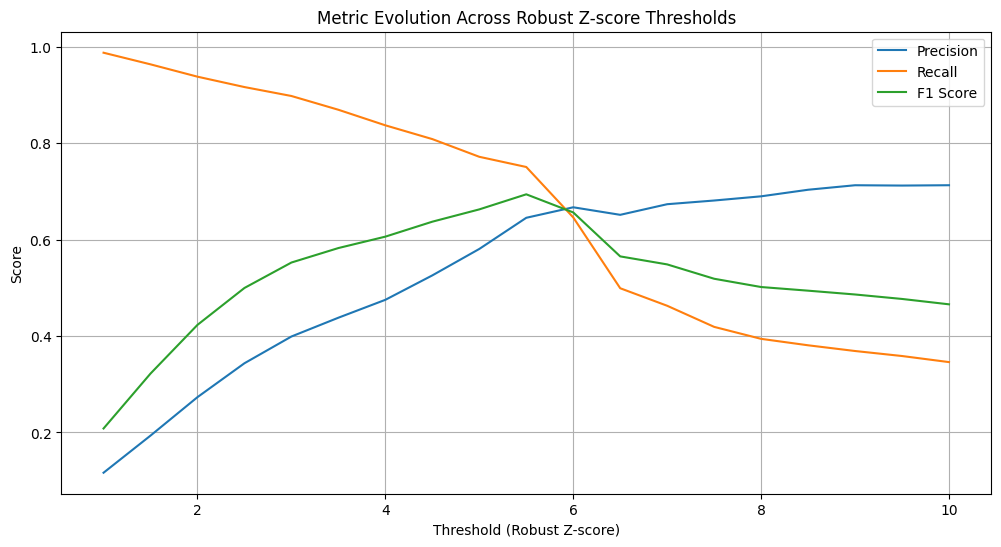

In [36]:

# Compute confusion matrix for the best threshold
df_test['z_robust'] = (z_robust > best_threshold).any(axis=1).astype(int)
cm = confusion_matrix(df_test['label'], df_test['z_robust'])

print("\nConfusion Matrix for Best Threshold:")
print(cm)
print("\nInterpretation:")
print(f"True Negatives (normal predicted as normal): {cm[0, 0]}")
print(f"False Positives (normal predicted as anomaly): {cm[0, 1]}")
print(f"False Negatives (anomaly predicted as normal): {cm[1, 0]}")
print(f"True Positives (anomaly predicted as anomaly): {cm[1, 1]}")

# Visualize the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Normal (0)', 'Anomaly (1)'],
            yticklabels=['Normal (0)', 'Anomaly (1)'])
plt.xlabel('Prediction')
plt.ylabel('True Label')
plt.title(f'Confusion Matrix (Robust Z-score, threshold={best_threshold:.4f})')
plt.show()

# Plot the evolution of precision, recall, and F1 score over different thresholds
plt.figure(figsize=(12, 6))
plt.plot(results_df['threshold'], results_df['precision'], label='Precision')
plt.plot(results_df['threshold'], results_df['recall'], label='Recall')
plt.plot(results_df['threshold'], results_df['f1_score'], label='F1 Score')
plt.xlabel('Threshold (Robust Z-score)')
plt.ylabel('Score')
plt.title('Metric Evolution Across Robust Z-score Thresholds')
plt.legend()
plt.grid(True)
plt.show()


# IQR

In [37]:
# Calculate the first (Q1) and third (Q3) quartiles for each feature
Q1 = df_test[features].quantile(0.25)
Q3 = df_test[features].quantile(0.75)

# Compute the Interquartile Range (IQR)
IQR = Q3 - Q1

# Define the lower and upper bounds for anomaly detection
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify anomalies based on whether any feature lies outside the IQR bounds
df_test['IQR_pred'] = ((df_test[features] < lower_bound) | (df_test[features] > upper_bound)).any(axis=1).astype(int)

# Evaluate model performance
print("Confusion Matrix (IQR Method):")
print(confusion_matrix(df_test['label'], df_test['IQR_pred']))
print(f"Precision: {precision_score(df_test['label'], df_test['IQR_pred'])}")
print(f"Recall: {recall_score(df_test['label'], df_test['IQR_pred'])}")
print(f"F1-score: {f1_score(df_test['label'], df_test['IQR_pred'])}")


Confusion Matrix (IQR Method):
[[21934  3851]
 [  265  2429]]
Precision: 0.38678343949044586
Recall: 0.9016332590942836
F1-score: 0.5413416536661466


# ML Supervised Models

## Random Forest

only for machine learning supervised model we should balanced data with **class_weight = Balanced** 

In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X_test = df_test[features]
y_test = df_test['label']
X_train_split, X_val, y_train_split, y_val = train_test_split(X_test, y_test, test_size=0.2, random_state=42)

model = RandomForestClassifier(class_weight='balanced', random_state=42)
model.fit(X_train_split, y_train_split)
df_test['RF_pred'] = model.predict(X_test)

# evaluate
print("Matrice de confusion (Random Forest) :")
print(confusion_matrix(df_test['label'], df_test['RF_pred']))
print(f"Précision : {precision_score(df_test['label'], df_test['RF_pred'])}")
print(f"Rappel : {recall_score(df_test['label'], df_test['RF_pred'])}")
print(f"F1-score : {f1_score(df_test['label'], df_test['RF_pred'])}")

Matrice de confusion (Random Forest) :
[[25755    30]
 [  126  2568]]
Précision : 0.9884526558891455
Rappel : 0.9532293986636972
F1-score : 0.9705215419501133


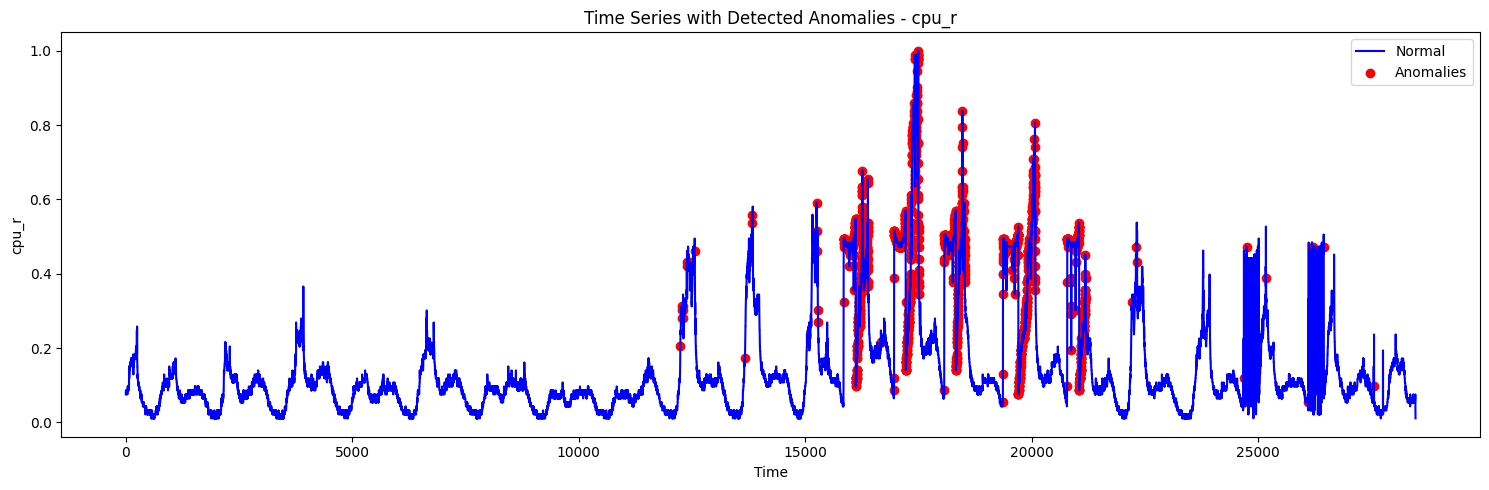

In [39]:
import matplotlib.pyplot as plt

feature_to_plot = 'cpu_r'

plt.figure(figsize=(15, 5))

plt.plot(df_test.index, df_test[feature_to_plot], label='Normal', color='blue')

anomalies = df_test[df_test['RF_pred'] == 1]
plt.scatter(anomalies.index, anomalies[feature_to_plot], color='red', label='Anomalies')

plt.title(f'Time Series with Detected Anomalies - {feature_to_plot}')
plt.xlabel('Time')
plt.ylabel(feature_to_plot)
plt.legend()
plt.tight_layout()
plt.show()


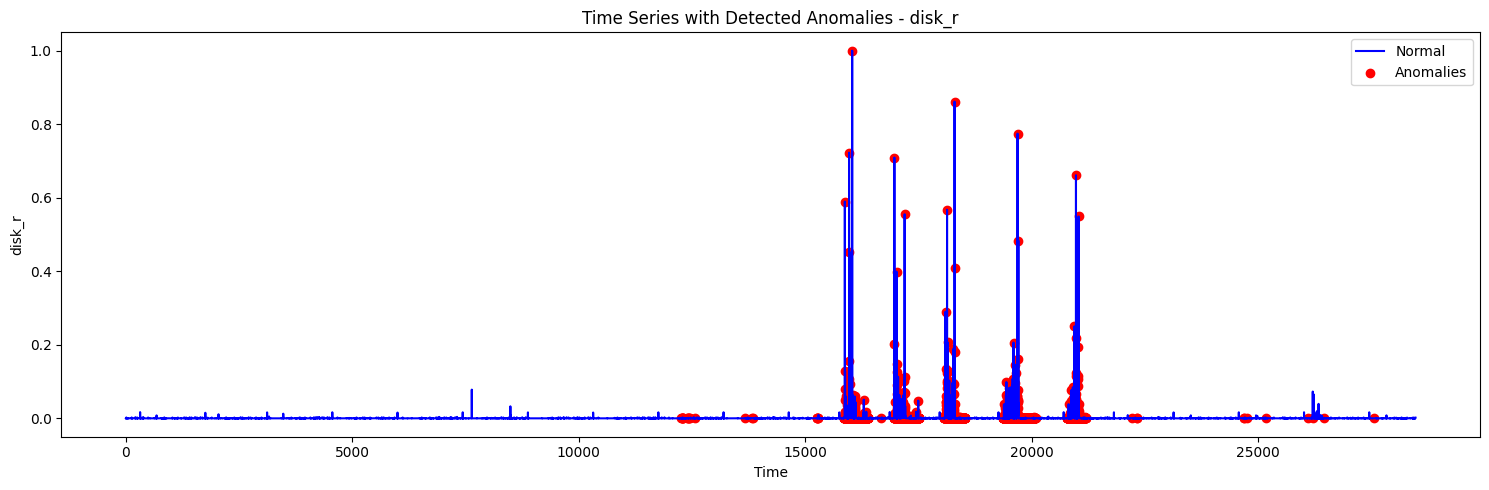

In [40]:
import matplotlib.pyplot as plt

feature_to_plot = 'disk_r'

plt.figure(figsize=(15, 5))

plt.plot(df_test.index, df_test[feature_to_plot], label='Normal', color='blue')

anomalies = df_test[df_test['RF_pred'] == 1]
plt.scatter(anomalies.index, anomalies[feature_to_plot], color='red', label='Anomalies')

plt.title(f'Time Series with Detected Anomalies - {feature_to_plot}')
plt.xlabel('Time')
plt.ylabel(feature_to_plot)
plt.legend()
plt.tight_layout()
plt.show()


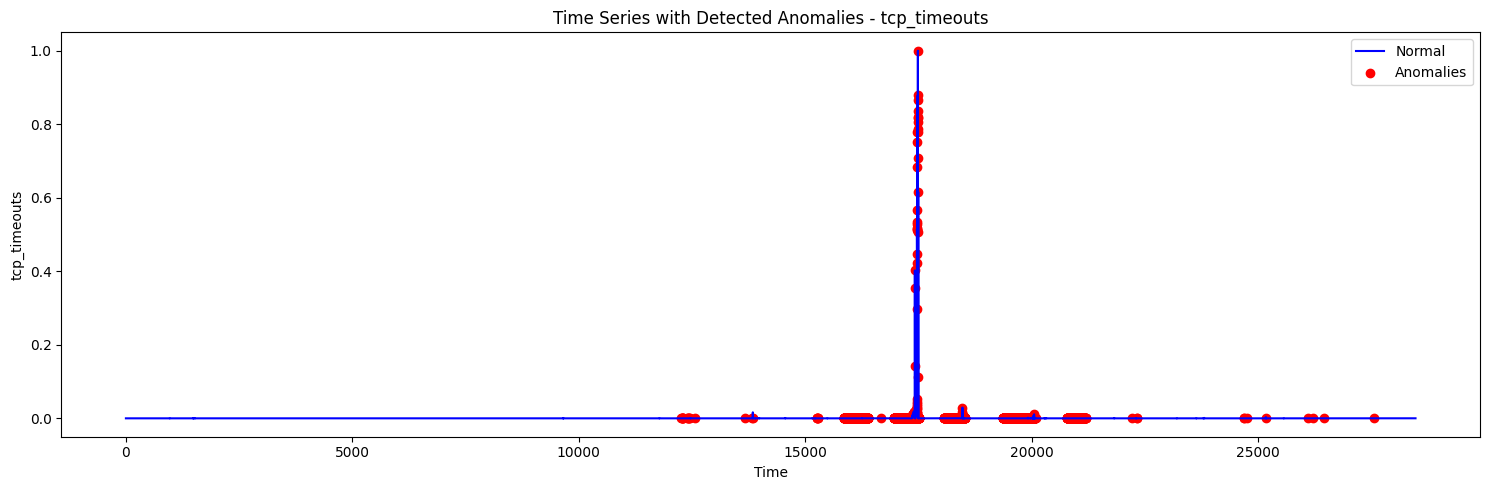

In [41]:
import matplotlib.pyplot as plt

feature_to_plot = 'tcp_timeouts'

plt.figure(figsize=(15, 5))

plt.plot(df_test.index, df_test[feature_to_plot], label='Normal', color='blue')

anomalies = df_test[df_test['RF_pred'] == 1]
plt.scatter(anomalies.index, anomalies[feature_to_plot], color='red', label='Anomalies')

plt.title(f'Time Series with Detected Anomalies - {feature_to_plot}')
plt.xlabel('Time')
plt.ylabel(feature_to_plot)
plt.legend()
plt.tight_layout()
plt.show()


## XGBClassifier

In [42]:
from xgboost import XGBClassifier

# Handle class imbalance by adjusting the scale_pos_weight parameter
scale_pos_weight = (len(y_test) - sum(y_test)) / sum(y_test)  

# Initialize the XGBoost classifier with the computed class weight
model = XGBClassifier(scale_pos_weight=scale_pos_weight, random_state=42)

# Train the model on the training split
model.fit(X_train_split, y_train_split)

# Predict anomalies on the full test set
df_test['XGB_pred'] = model.predict(X_test)

# Evaluate model performance
print("Confusion Matrix (XGBoost):")
print(confusion_matrix(df_test['label'], df_test['XGB_pred']))
print(f"Precision: {precision_score(df_test['label'], df_test['XGB_pred'])}")
print(f"Recall: {recall_score(df_test['label'], df_test['XGB_pred'])}")
print(f"F1-score: {f1_score(df_test['label'], df_test['XGB_pred'])}")


Confusion Matrix (XGBoost):
[[25500   285]
 [   56  2638]]
Precision: 0.9024974341430038
Recall: 0.9792130660727543
F1-score: 0.9392914367099874


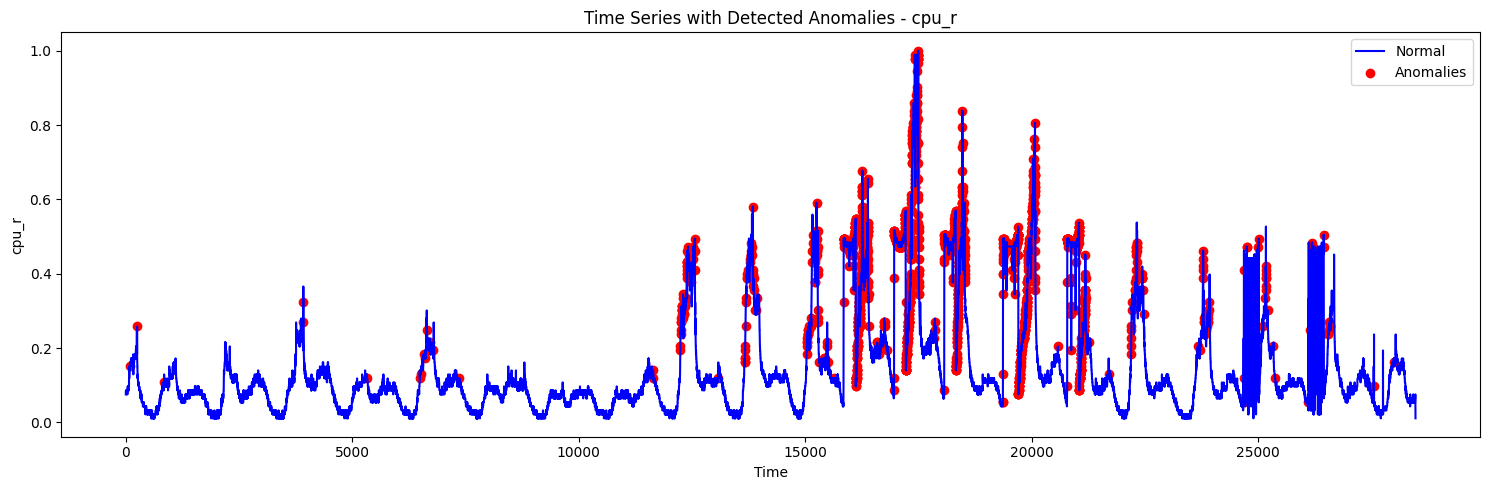

In [43]:
import matplotlib.pyplot as plt

feature_to_plot = 'cpu_r'

plt.figure(figsize=(15, 5))

plt.plot(df_test.index, df_test[feature_to_plot], label='Normal', color='blue')

anomalies = df_test[df_test['XGB_pred'] == 1]
plt.scatter(anomalies.index, anomalies[feature_to_plot], color='red', label='Anomalies')

plt.title(f'Time Series with Detected Anomalies - {feature_to_plot}')
plt.xlabel('Time')
plt.ylabel(feature_to_plot)
plt.legend()
plt.tight_layout()
plt.show()


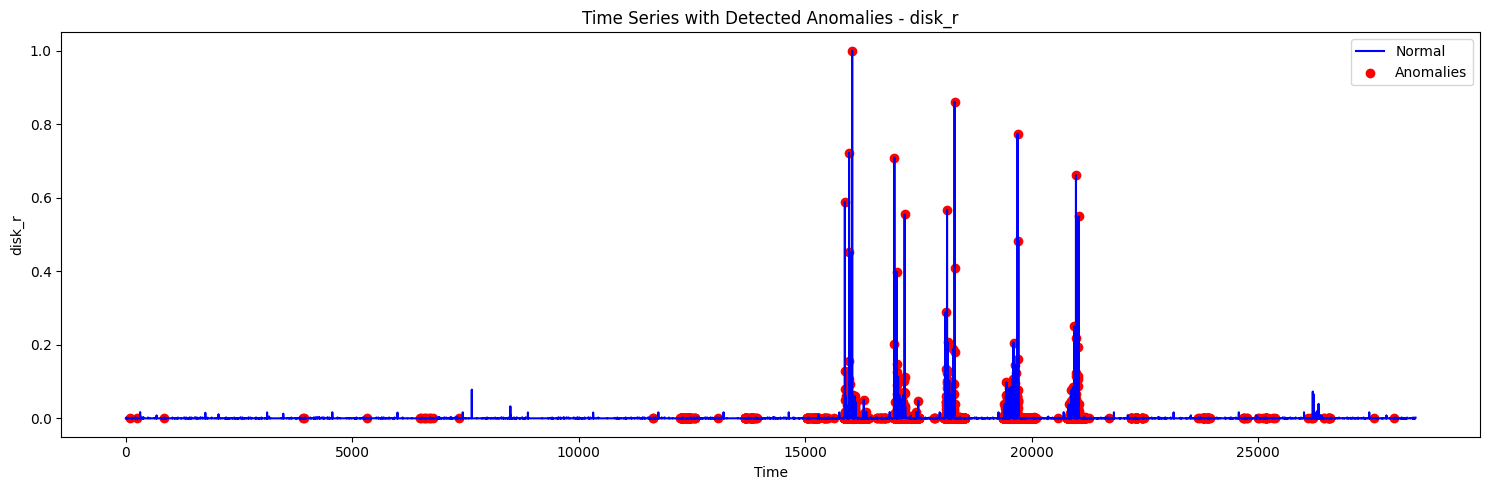

In [44]:
import matplotlib.pyplot as plt

feature_to_plot = 'disk_r'

plt.figure(figsize=(15, 5))

plt.plot(df_test.index, df_test[feature_to_plot], label='Normal', color='blue')

anomalies = df_test[df_test['XGB_pred'] == 1]
plt.scatter(anomalies.index, anomalies[feature_to_plot], color='red', label='Anomalies')

plt.title(f'Time Series with Detected Anomalies - {feature_to_plot}')
plt.xlabel('Time')
plt.ylabel(feature_to_plot)
plt.legend()
plt.tight_layout()
plt.show()


# Unsupervised neural network 

## verify normalization

In [45]:
import warnings
warnings.filterwarnings('ignore')  # Ignore warning messages for cleaner output

# Function to check normalization of a given dataset
def check_normalization(df, dataset_name):
    print(f"\nNormalization analysis for {dataset_name} :")
    
    # Descriptive statistics of the selected features
    stats = df[features].describe()
    print("\nDescriptive statistics:")
    print(stats.round(4))
    
    # Check if data is Min-Max scaled (within [0, 1] or [-1, 1])
    min_values = stats.loc['min']
    max_values = stats.loc['max']
    if (min_values >= 0).all() and (max_values <= 1).all():
        print("\nData appears to be normalized using Min-Max Scaling ([0, 1] range).")
    else:
        print("\nData appears to be normalized using Min-Max Scaling ([-1, 1] range).")
    
    # Check if data is standardized (mean ≈ 0 and std ≈ 1)
    mean_values = stats.loc['mean']
    std_values = stats.loc['std']
    if (mean_values.abs() < 0.1).all() and ((std_values > 0.9) & (std_values < 1.1)).all():
        print("\nData appears to be standardized (mean ≈ 0, std ≈ 1).")
    
    # Visualization: histograms for each feature
    plt.figure(figsize=(15, 10))
    for i, feature in enumerate(features, 1):
        plt.subplot(4, 4, i)
        sns.histplot(df[feature], bins=30, kde=True)
        plt.title(feature)
    plt.tight_layout()
    plt.suptitle(f"Feature histograms for {dataset_name}", y=1.02)
    plt.show()
    
    # Visualization: boxplots to observe data distribution and outliers
    plt.figure(figsize=(15, 6))
    df[features].boxplot()
    plt.title(f"Feature boxplots for {dataset_name}")
    plt.xticks(rotation=45)
    plt.show()


Normalization analysis for df_train :

Descriptive statistics:
            cpu_r      load_1      load_5       mem_u      disk_q      disk_r  \
count  28479.0000  28479.0000  28479.0000  28479.0000  28479.0000  28479.0000   
mean       0.0642      0.0569      0.0535      0.9136      0.0203      0.0002   
std        0.0567      0.0425      0.0377      0.0380      0.0100      0.0013   
min        0.0000      0.0000      0.0000      0.0000      0.0000      0.0000   
25%        0.0323      0.0275      0.0279      0.9077      0.0123      0.0000   
50%        0.0430      0.0456      0.0424      0.9128      0.0210      0.0000   
75%        0.0860      0.0752      0.0702      0.9205      0.0280      0.0001   
max        0.4946      0.4216      0.2787      1.0000      0.1181      0.1404   

           disk_w      disk_u     eth1_fi     eth1_fo  tcp_timeouts  
count  28479.0000  28479.0000  28479.0000  28479.0000    28479.0000  
mean       0.0512      0.0266      0.0804      0.0619        0.000

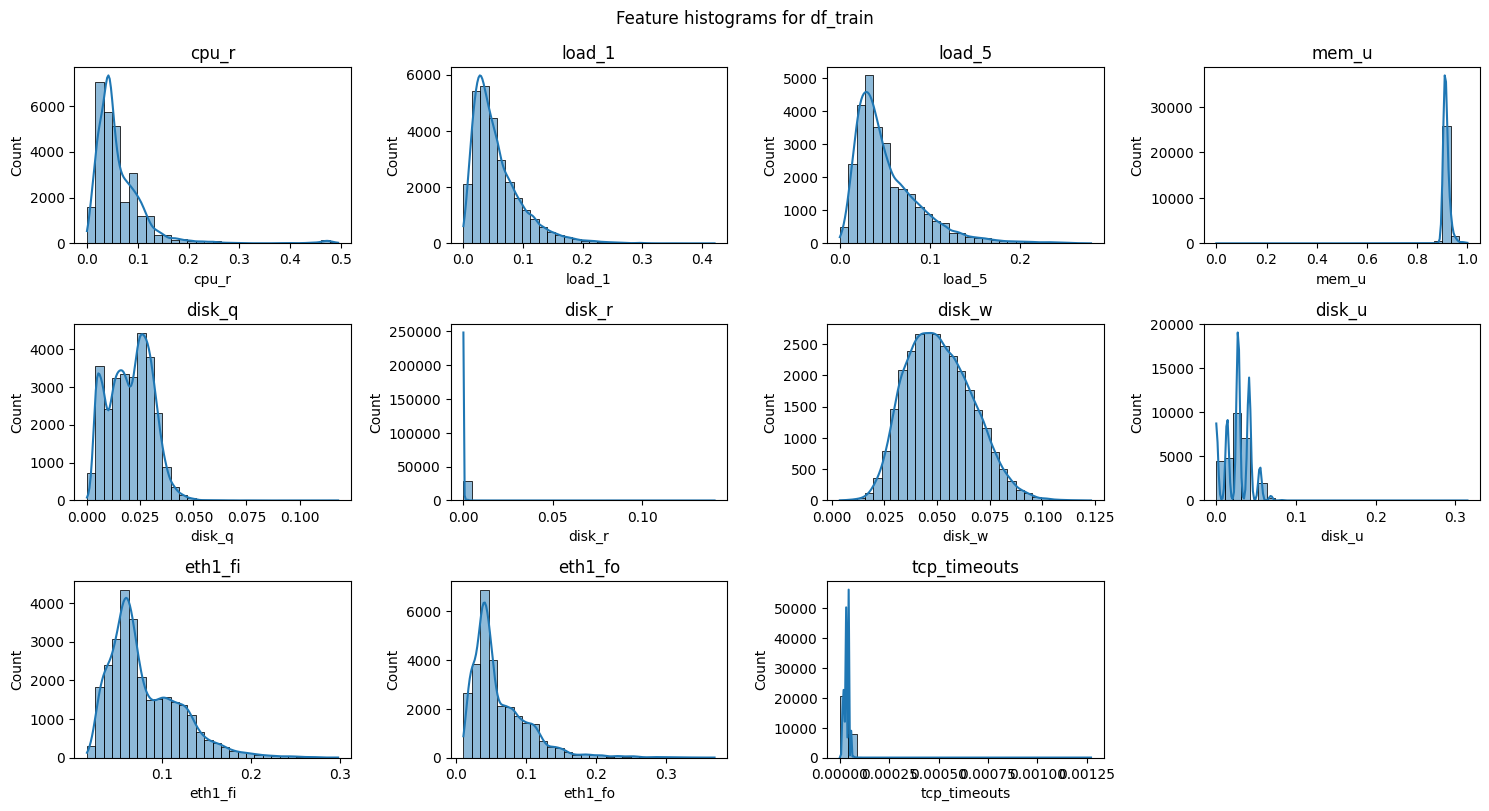

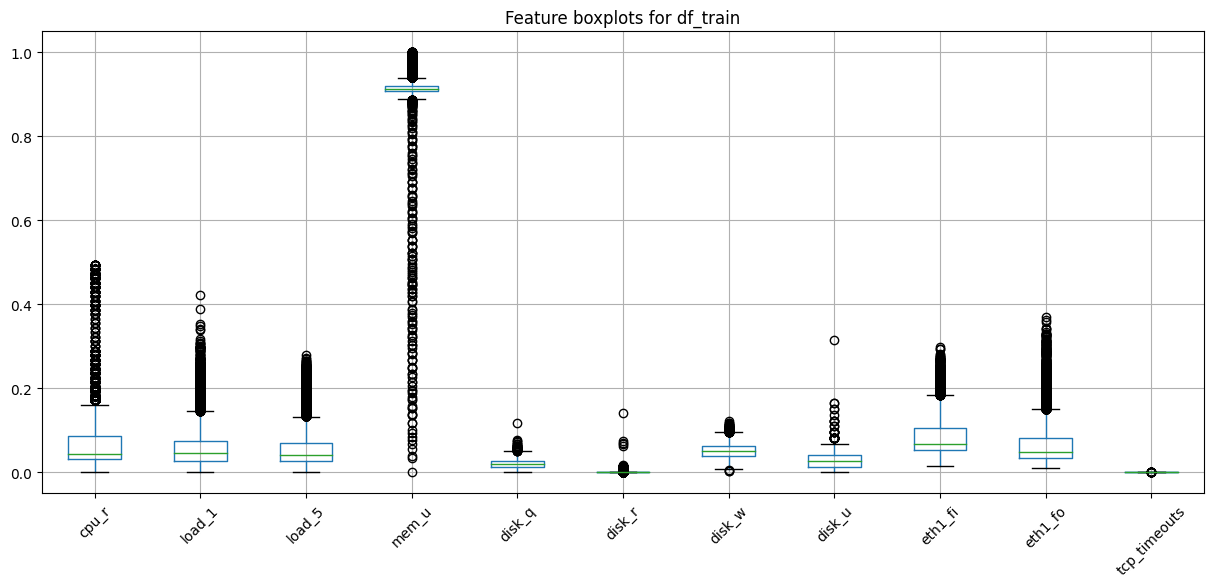


Normalization analysis for df_test :

Descriptive statistics:
            cpu_r      load_1      load_5       mem_u      disk_q      disk_r  \
count  28479.0000  28479.0000  28479.0000  28479.0000  28479.0000  28479.0000   
mean       0.1452      0.1083      0.1079      0.9158      0.0238      0.0010   
std        0.1362      0.1022      0.1021      0.0307      0.0197      0.0157   
min        0.0108      0.0000      0.0022      0.1077      0.0000      0.0000   
25%        0.0645      0.0477      0.0502      0.8974      0.0136      0.0000   
50%        0.0968      0.0794      0.0803      0.9077      0.0243      0.0001   
75%        0.1613      0.1314      0.1204      0.9256      0.0312      0.0002   
max        1.0000      1.0000      1.0000      1.0000      1.0000      1.0000   

           disk_w      disk_u     eth1_fi     eth1_fo  tcp_timeouts  
count  28479.0000  28479.0000  28479.0000  28479.0000    28479.0000  
mean       0.0556      0.0303      0.1287      0.1219        0.0007

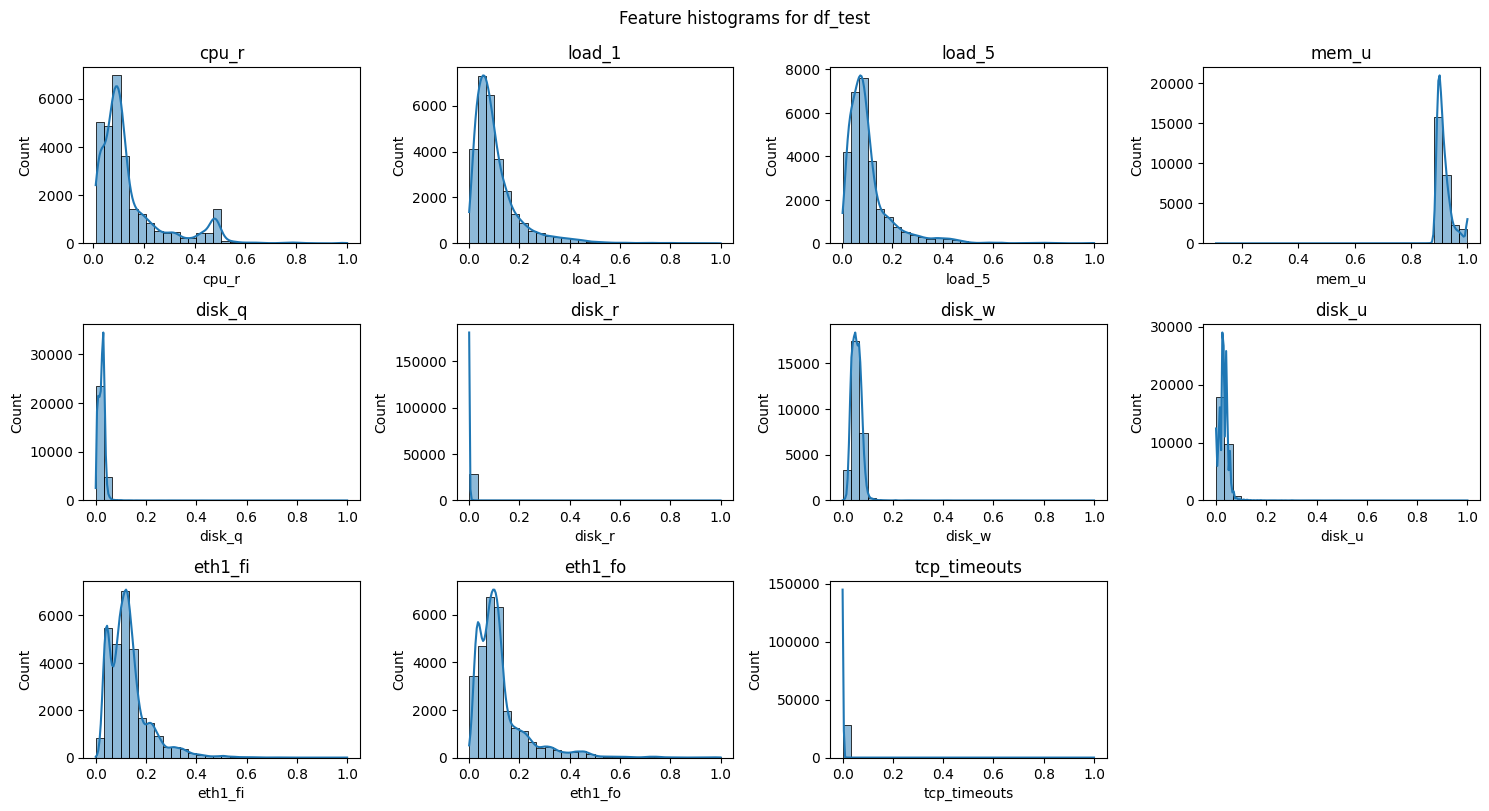

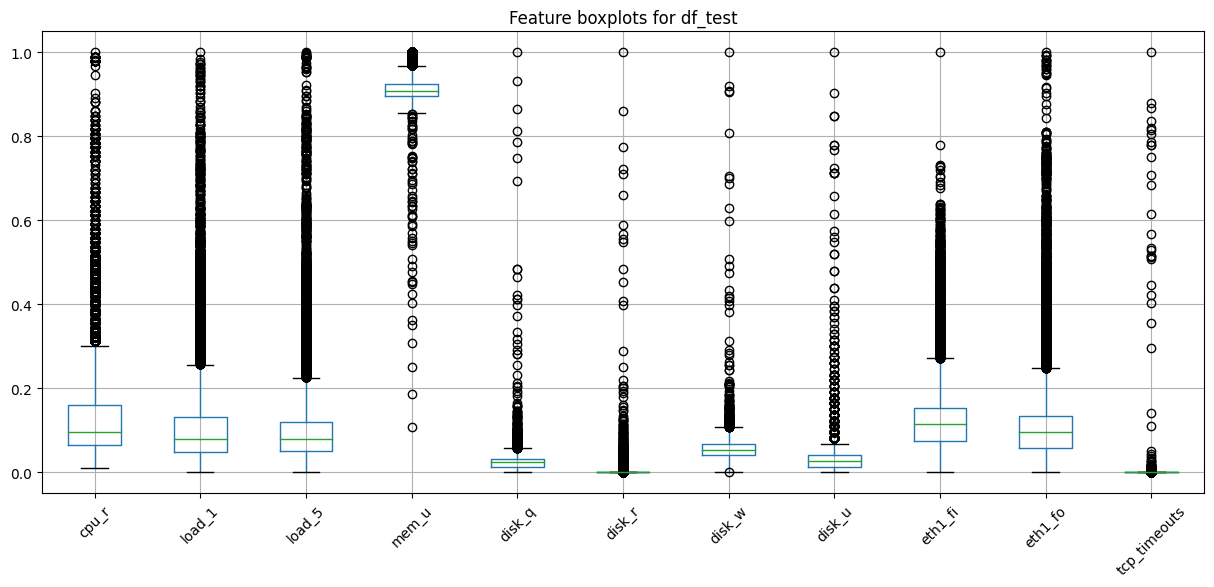


Comparison of feature ranges between df_train and df_test:

Range (max - min) for df_train:
cpu_r           0.4946
load_1          0.4216
load_5          0.2787
mem_u           1.0000
disk_q          0.1181
disk_r          0.1404
disk_w          0.1192
disk_u          0.3151
eth1_fi         0.2821
eth1_fo         0.3595
tcp_timeouts    0.0013
dtype: float64

Range (max - min) for df_test:
cpu_r           0.9892
load_1          1.0000
load_5          0.9978
mem_u           0.8923
disk_q          1.0000
disk_r          1.0000
disk_w          1.0000
disk_u          1.0000
eth1_fi         1.0000
eth1_fo         1.0000
tcp_timeouts    1.0000
dtype: float64


In [46]:
# Check normalization for both training and test datasets
check_normalization(df_train, "df_train")
check_normalization(df_test, "df_test")

# Compare feature value ranges between train and test datasets
print("\nComparison of feature ranges between df_train and df_test:")
train_range = df_train[features].max() - df_train[features].min()
test_range = df_test[features].max() - df_test[features].min()
print("\nRange (max - min) for df_train:")
print(train_range.round(4))
print("\nRange (max - min) for df_test:")
print(test_range.round(4))


## AutoEncoders

In [47]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

2025-07-27 14:58:47.832825: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1753628327.979385      36 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1753628328.027888      36 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [48]:
# Prepare training and test feature sets (already normalized)
X_train = df_train[features]
X_test = df_test[features]

# Define and compile the AutoEncoder model
model = Sequential([
    Dense(64, activation='relu', input_shape=(len(features),)),  
    Dense(64, activation='relu'),                                
    Dense(32, activation='relu'),                                
    Dense(len(features), activation='linear')                    
])
model.compile(optimizer='adam', loss='mse')  

# Train the AutoEncoder to reconstruct its input
history = model.fit(
    X_train, X_train,
    epochs=50,
    batch_size=32,
    validation_split=0.1,
    verbose=1
)

I0000 00:00:1753628339.684753      36 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15513 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0


Epoch 1/40


I0000 00:00:1753628342.460916     102 service.cc:148] XLA service 0x7ee724004580 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1753628342.461451     102 service.cc:156]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
I0000 00:00:1753628342.695355     102 cuda_dnn.cc:529] Loaded cuDNN version 90300


 76/801 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0439

I0000 00:00:1753628343.311151     102 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


801/801 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0087 - val_loss: 3.8997e-05
Epoch 2/40
801/801 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 2.5209e-05 - val_loss: 1.6610e-05
Epoch 3/40
801/801 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1.0794e-05 - val_loss: 9.9976e-06
Epoch 4/40
801/801 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 6.1872e-06 - val_loss: 5.1179e-06
Epoch 5/40
801/801 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 3.2931e-06 - val_loss: 2.4281e-06
Epoch 6/40
801/801 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1.7067e-06 - val_loss: 1.5389e-06
Epoch 7/40
801/801 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1.2068e-06 - val_loss: 9.1948e-07
Epoch 8/40
801/801 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1.0695e-06 - val_loss: 4.6371e-07
Epoch 9/40
801/801 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 6.8770e-07 - val_loss: 2.0769e-06
Epoch 10/40
801/801 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 9.1057e-07 - val_loss: 3.0962e-07
Epoch 11/40
801/801 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 8.4267e-07 - 

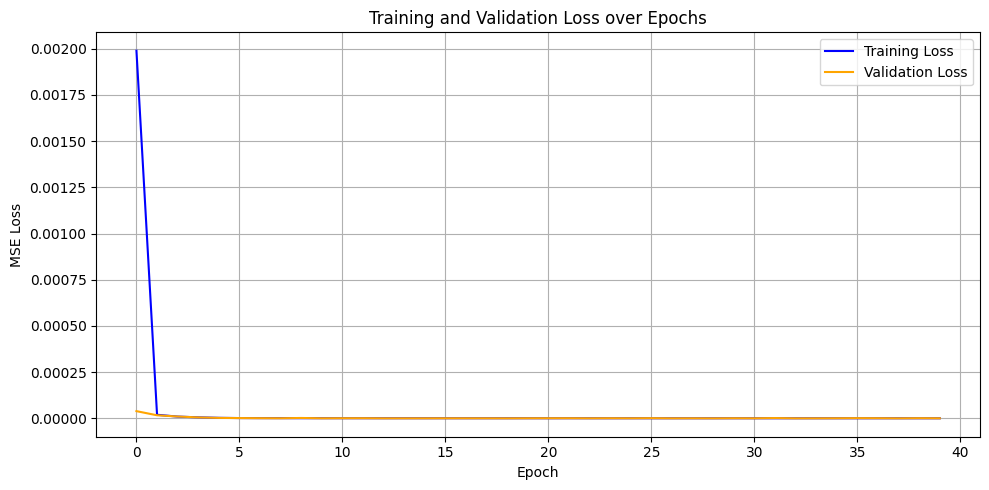

In [49]:
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.title('Training and Validation Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [50]:
# Predict reconstructions for the test set
reconstructions = model.predict(X_test)

# Compute the reconstruction error (MSE) for each sample
mse = np.mean(np.square(reconstructions - X_test), axis=1)

890/890 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


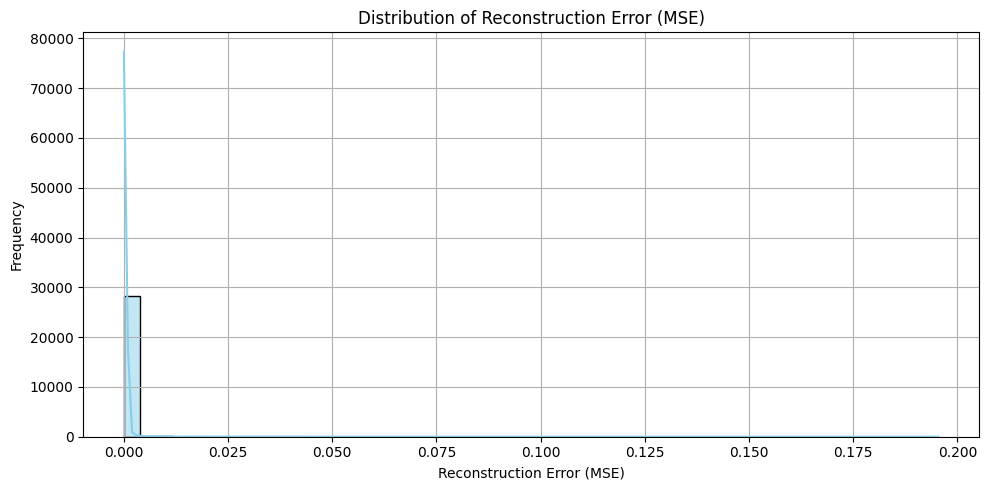

In [51]:
# Add MSE to the test DataFrame for reference (optional)
df_test['reconstruction_error'] = mse

# Plot the distribution of reconstruction error
plt.figure(figsize=(10, 5))
sns.histplot(mse, bins=50, kde=True, color='skyblue')
plt.title('Distribution of Reconstruction Error (MSE)')
plt.xlabel('Reconstruction Error (MSE)')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()

In [52]:
# Grid search over thresholds based on MSE percentiles
percentile_values = np.arange(90,91, 99.1)  # Test thresholds from 90th to 99th percentile
results = []

for percentile in percentile_values:
    threshold = np.percentile(mse, percentile)  # Define threshold based on current percentile
    df_test['anomaly_pred'] = (mse > threshold).astype(int)  # Flag anomaly if MSE > threshold
    
    # Compute evaluation metrics
    precision = precision_score(df_test['label'], df_test['anomaly_pred'], zero_division=0)
    recall = recall_score(df_test['label'], df_test['anomaly_pred'])
    f1 = f1_score(df_test['label'], df_test['anomaly_pred'])
    
    # Store results
    results.append({
        'percentile': percentile,
        'threshold': threshold,
        'precision': precision,
        'recall': recall,
        'f1_score': f1
    })

# Convert the results into a DataFrame for analysis
results_df = pd.DataFrame(results)



In [53]:
# Display the performance of each threshold
print("\nGrid Search Results (AutoEncoder):")
print(results_df.round(4))

# Identify the best threshold based on the highest F1-score
best_result = results_df.loc[results_df['f1_score'].idxmax()]
best_percentile = best_result['percentile']
best_threshold = best_result['threshold']
print(f"\nBest percentile: {best_percentile:.2f}")
print(f"Best threshold (MSE): {best_threshold:.6f}")
print(f"Precision: {best_result['precision']:.4f}")
print(f"Recall: {best_result['recall']:.4f}")
print(f"F1-score: {best_result['f1_score']:.4f}")


Grid Search Results (AutoEncoder):
   percentile  threshold  precision  recall  f1_score
0        90.0        0.0     0.5671  0.5995    0.5828

Best percentile: 90.00
Best threshold (MSE): 0.000001
Precision: 0.5671
Recall: 0.5995
F1-score: 0.5828



Confusion Matrix (Best Threshold):
[[24552  1233]
 [ 1079  1615]]

Interpretation:
True Negatives (normal predicted as normal): 24552
False Positives (normal predicted as anomaly): 1233
False Negatives (anomaly predicted as normal): 1079
True Positives (anomaly predicted as anomaly): 1615


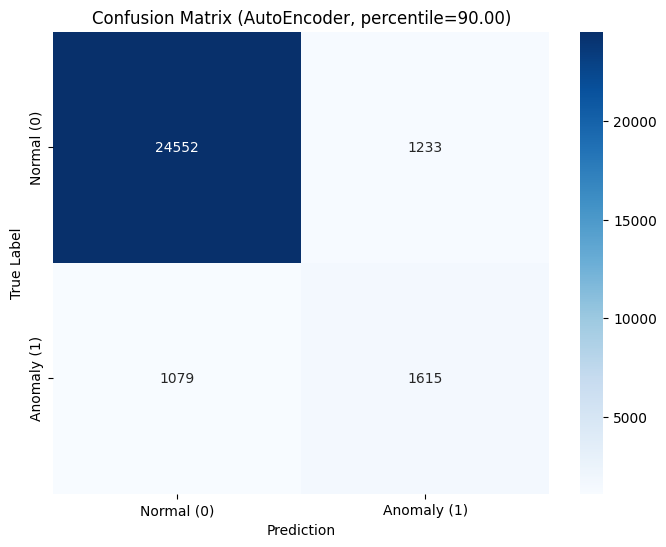

In [54]:
# Generate predictions using the best threshold
df_test['AE_pred'] = (mse > best_threshold).astype(int)

# Compute and display confusion matrix
cm = confusion_matrix(df_test['label'], df_test['AE_pred'])
print("\nConfusion Matrix (Best Threshold):")
print(cm)
print("\nInterpretation:")
print(f"True Negatives (normal predicted as normal): {cm[0, 0]}")
print(f"False Positives (normal predicted as anomaly): {cm[0, 1]}")
print(f"False Negatives (anomaly predicted as normal): {cm[1, 0]}")
print(f"True Positives (anomaly predicted as anomaly): {cm[1, 1]}")

# Visualize the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Normal (0)', 'Anomaly (1)'],
            yticklabels=['Normal (0)', 'Anomaly (1)'])
plt.xlabel('Prediction')
plt.ylabel('True Label')
plt.title(f'Confusion Matrix (AutoEncoder, percentile={best_percentile:.2f})')
plt.show()



## LSTM 

In [55]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import Sequence
from tensorflow.keras.layers import BatchNormalization


In [56]:
# Custom data generator for time series data
class TimeSeriesGenerator(Sequence):
    def __init__(self, data, features, seq_length=50, step=10, batch_size=64):
        self.data = data[features].values
        self.seq_length = seq_length
        self.step = step
        self.batch_size = batch_size
        self.indices = np.arange(0, len(data) - seq_length + 1, step)

    def __len__(self):
        return int(np.ceil(len(self.indices) / self.batch_size))

    def __getitem__(self, index):
        start = index * self.batch_size
        end = min(start + self.batch_size, len(self.indices))
        batch_indices = self.indices[start:end]
        
        # Create sequences of time steps
        sequences = np.array([self.data[i:i+self.seq_length] for i in batch_indices])
        
        # Flatten each sequence for reconstruction comparison
        sequences_flat = sequences.reshape(sequences.shape[0], -1)
        return sequences, sequences_flat

In [57]:
# Paramètres
seq_length = 40
step = 10
batch_size = 64

train_gen = TimeSeriesGenerator(df_train, features, seq_length, step, batch_size)
test_gen = TimeSeriesGenerator(df_test, features, seq_length, step, batch_size)

def create_lstm_model(units=64, input_shape=(seq_length, len(features)), dropout=0.2):
    model = Sequential([
        LSTM(units * 2, activation='tanh', return_sequences=True, input_shape=input_shape),
        Dropout(dropout),
        LSTM(units, activation='tanh', return_sequences=True),
        Dropout(dropout),
        LSTM(units // 2, activation='tanh'),
        Dropout(dropout),
        Dense(seq_length * len(features), activation='linear')
    ])
    model.compile(optimizer=Adam(learning_rate=1e-4), loss='mse')
    return model

model = create_lstm_model()

Epoch 1/80
45/45 - 7s - 159ms/step - loss: 0.0750 - val_loss: 0.0750
Epoch 2/80
45/45 - 1s - 16ms/step - loss: 0.0598 - val_loss: 0.0482
Epoch 3/80
45/45 - 1s - 16ms/step - loss: 0.0412 - val_loss: 0.0276
Epoch 4/80
45/45 - 1s - 16ms/step - loss: 0.0290 - val_loss: 0.0183
Epoch 5/80
45/45 - 1s - 16ms/step - loss: 0.0224 - val_loss: 0.0142
Epoch 6/80
45/45 - 1s - 16ms/step - loss: 0.0186 - val_loss: 0.0118
Epoch 7/80
45/45 - 1s - 16ms/step - loss: 0.0155 - val_loss: 0.0105
Epoch 8/80
45/45 - 1s - 16ms/step - loss: 0.0136 - val_loss: 0.0093
Epoch 9/80
45/45 - 1s - 16ms/step - loss: 0.0119 - val_loss: 0.0087
Epoch 10/80
45/45 - 1s - 16ms/step - loss: 0.0108 - val_loss: 0.0082
Epoch 11/80
45/45 - 1s - 16ms/step - loss: 0.0098 - val_loss: 0.0079
Epoch 12/80
45/45 - 1s - 16ms/step - loss: 0.0088 - val_loss: 0.0078
Epoch 13/80
45/45 - 1s - 16ms/step - loss: 0.0082 - val_loss: 0.0074
Epoch 14/80
45/45 - 1s - 16ms/step - loss: 0.0075 - val_loss: 0.0071
Epoch 15/80
45/45 - 1s - 16ms/step - loss:

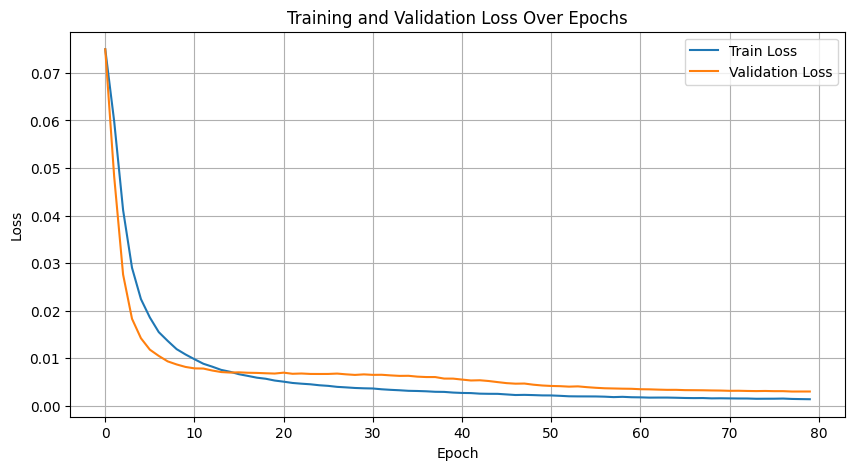

In [58]:
# Entraînement
early_stop = EarlyStopping(monitor='loss', patience=5, restore_best_weights=True)
history = model.fit(train_gen, epochs=80, validation_data=test_gen, callbacks=[early_stop], verbose=2)

# Plot training and validation loss
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


In [59]:
# Reconstruction et erreur MSE
reconstructions = []
for i in range(len(test_gen)):
    x_batch, x_flat = test_gen[i]
    recon = model.predict(x_batch, verbose=0)
    reconstructions.append(recon)
reconstructions = np.concatenate(reconstructions)
test_x_flat = np.concatenate([test_gen[i][1] for i in range(len(test_gen))])
mse = np.mean(np.square(reconstructions - test_x_flat), axis=1)

# Aligner résultats avec df_test
df_test_aligned = df_test.iloc[test_gen.indices].copy()
df_test_aligned['mse'] = mse[:len(df_test_aligned)]


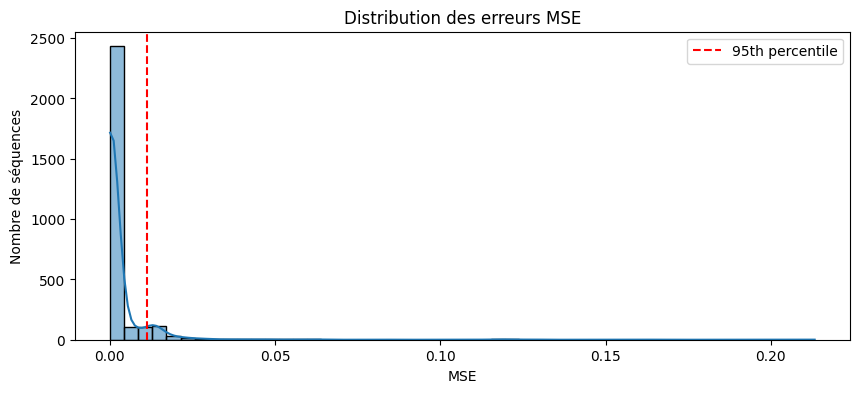

In [60]:
plt.figure(figsize=(10, 4))
sns.histplot(df_test_aligned['mse'], bins=50, kde=True)
plt.axvline(df_test_aligned['mse'].quantile(0.91), color='red', linestyle='--', label='95th percentile')
plt.title('Distribution des erreurs MSE')
plt.xlabel('MSE')
plt.ylabel('Nombre de séquences')
plt.legend()
plt.show()


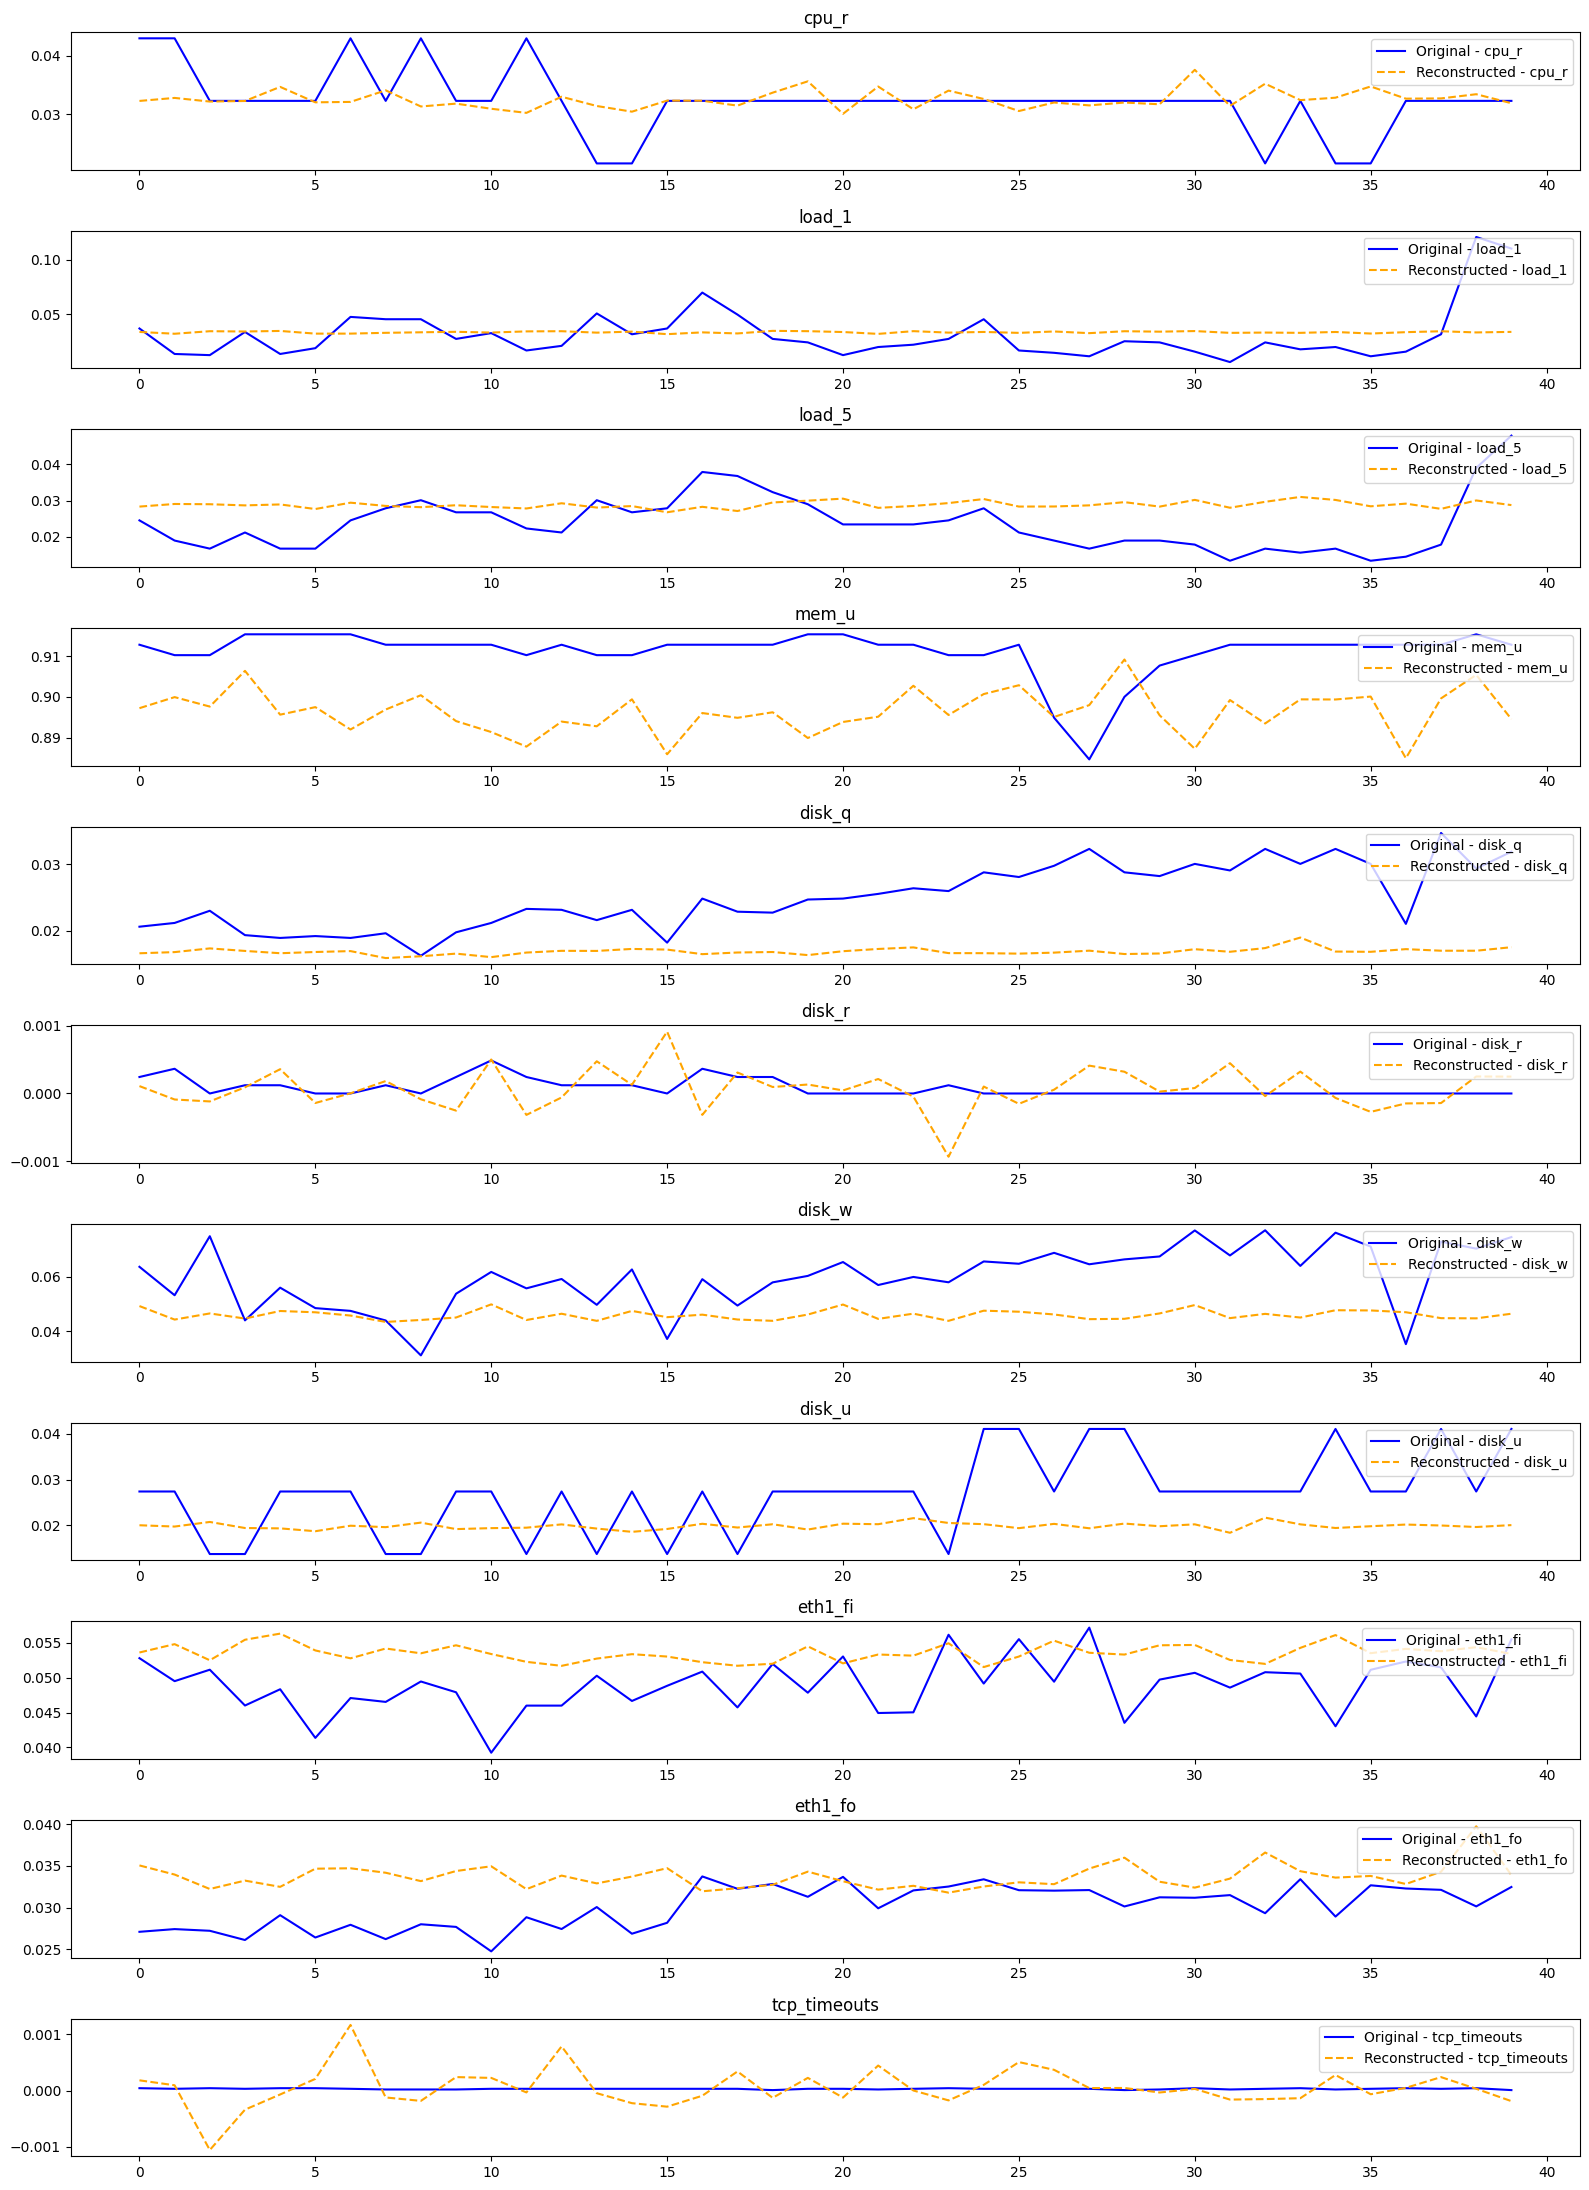

In [61]:
# Select a sequence from the training dataset
x_batch, x_flat = train_gen[5]  
sequence_index = 10  
sequence_original = x_batch[sequence_index] 

sequence_pred_flat = model.predict(np.expand_dims(sequence_original, axis=0), verbose=0)[0]  
# Output shape: (seq_length * number_of_features,)

sequence_pred = sequence_pred_flat.reshape(seq_length, len(features))  

#Plot original vs reconstructed values for each feature
plt.figure(figsize=(16, len(features) * 2))
for i, feature in enumerate(features):
    plt.subplot(len(features), 1, i + 1)
    plt.plot(sequence_original[:, i], label=f'Original - {feature}', color='blue')
    plt.plot(sequence_pred[:, i], label=f'Reconstructed - {feature}', color='orange', linestyle='--')
    plt.title(feature)
    plt.legend(loc='upper right')

plt.tight_layout()
plt.show()


Precision: 0.7617
Recall: 0.7249
F1-score: 0.7429
Matrice de confusion:
[[2514   61]
 [  74  195]]


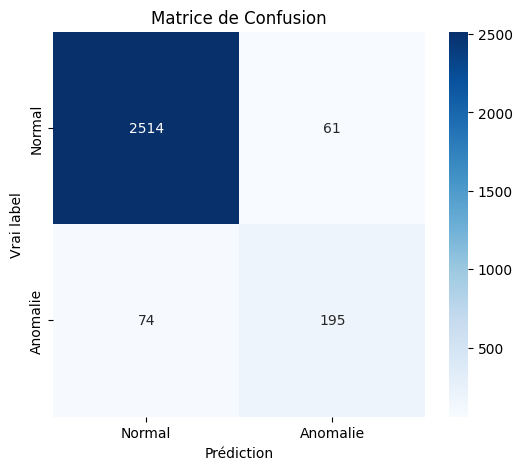

In [62]:
threshold = np.percentile(mse, 91)
df_test_aligned['LSTM_pred'] = (df_test_aligned['mse'] > threshold).astype(int)

precision = precision_score(df_test_aligned['label'], df_test_aligned['LSTM_pred'], zero_division=0)
recall = recall_score(df_test_aligned['label'], df_test_aligned['LSTM_pred'])
f1 = f1_score(df_test_aligned['label'], df_test_aligned['LSTM_pred'])
cm = confusion_matrix(df_test_aligned['label'], df_test_aligned['LSTM_pred'])

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
print("Matrice de confusion:")
print(cm)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Normal', 'Anomalie'],
            yticklabels=['Normal', 'Anomalie'])
plt.xlabel('Prédiction')
plt.ylabel('Vrai label')
plt.title('Matrice de Confusion')
plt.show()


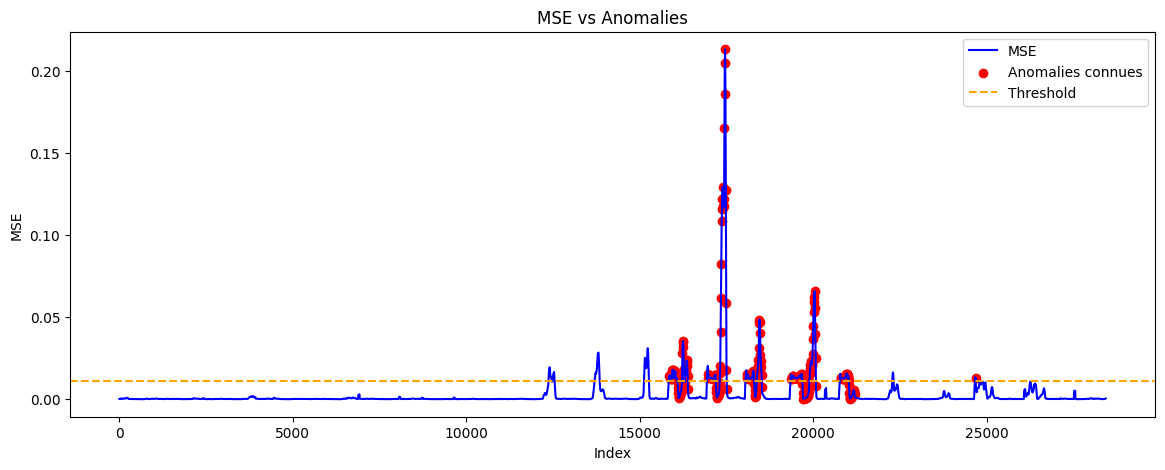

In [63]:
plt.figure(figsize=(14, 5))
plt.plot(df_test_aligned.index, df_test_aligned['mse'], label='MSE', color='blue')
plt.scatter(df_test_aligned[df_test_aligned['label'] == 1].index,
            df_test_aligned[df_test_aligned['label'] == 1]['mse'],
            color='red', label='Anomalies connues')
plt.axhline(df_test_aligned['mse'].quantile(0.91), color='orange', linestyle='--', label='Threshold')
plt.title("MSE vs Anomalies")
plt.xlabel("Index")
plt.ylabel("MSE")
plt.legend()
plt.show()


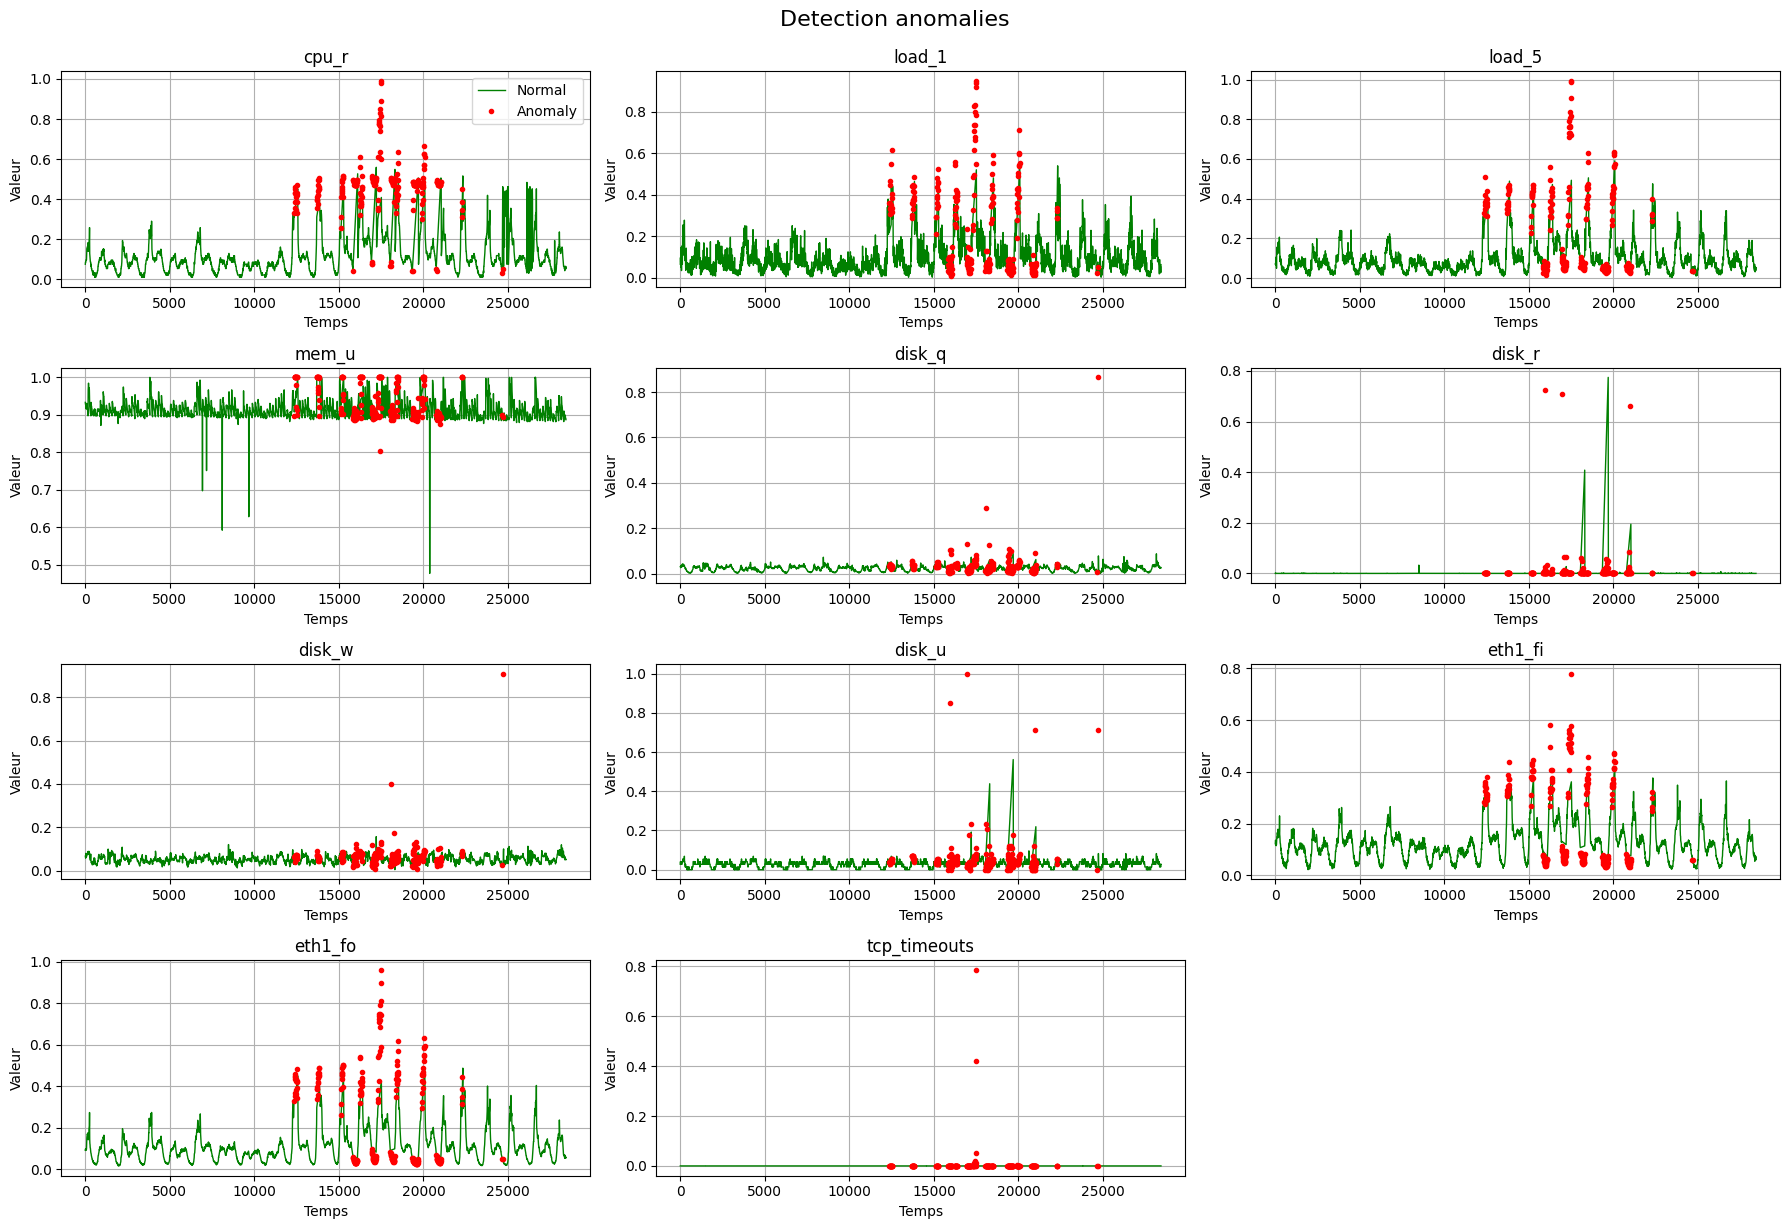

In [64]:
n_features = len(features)
n_cols = 3
n_rows = (n_features + n_cols - 1) // n_cols

plt.figure(figsize=(18, 3 * n_rows))

for i, feature in enumerate(features):
    plt.subplot(n_rows, n_cols, i + 1)

    normal = df_test_aligned[df_test_aligned['LSTM_pred'] == 0]
    plt.plot(normal['timestamp'], normal[feature], color='green', label='Normal', linewidth=1)

    anomalies = df_test_aligned[df_test_aligned['LSTM_pred'] == 1]
    plt.plot(anomalies['timestamp'], anomalies[feature], 'ro', label='Anomaly', markersize=3)

    plt.title(feature)
    plt.xlabel('Temps')
    plt.ylabel('Valeur')
    plt.grid(True)
    if i == 0:
        plt.legend(loc='upper right')

plt.tight_layout()
plt.suptitle("Detection anomalies", fontsize=16, y=1.02)
plt.show()


## Lstm vae

In [79]:
import pandas as pd 

train_data='/kaggle/working/machine-1-1_train_filtered.csv'
test_data='/kaggle/working/machine-1-1_test_filtered.csv'

df_train=pd.read_csv(train_data)
df_test=pd.read_csv(test_data)



In [80]:
df_train = df_train.drop(columns=['timestamp'], errors='ignore')
df_test_timestamp = df_test['timestamp'].copy()
df_test = df_test.drop(columns=['timestamp'], errors='ignore')

# Extraire le label
y_test = df_test['label'].values
df_test = df_test.drop(columns=['label'], errors='ignore')

In [81]:
def interval_to_float(df):
    for col in df.columns:
        if isinstance(df[col].iloc[0], pd.Interval):
            df[col] = df[col].apply(lambda x: x.left)
    return df

df_train = interval_to_float(df_train)
df_test = interval_to_float(df_test)


In [83]:
def create_sequences(data, seq_len):
    seqs = []
    for i in range(len(data) - seq_len):
        seqs.append(data[i:i + seq_len])
    return np.array(seqs)

seq_length = 30
X_train_seq = create_sequences(df_train.values, seq_length).astype(np.float32)
X_test_seq = create_sequences(df_test.values, seq_length).astype(np.float32)
y_test_seq = y_test[seq_length:]
df_test_ts_seq = df_test_timestamp[seq_length:].reset_index(drop=True)


In [95]:
from tensorflow.keras import Model, Input
from tensorflow.keras.layers import LSTM, Dense, RepeatVector, TimeDistributed
import tensorflow as tf

class LSTMVAE(Model):
    def __init__(self, timesteps, input_dim, latent_dim=8):  
        super(LSTMVAE, self).__init__()
        self.timesteps = timesteps
        self.input_dim = input_dim
        self.latent_dim = latent_dim

        # Encoder renforcé
        self.encoder_lstm1 = LSTM(64, return_sequences=True)   # augmenté
        self.encoder_lstm2 = LSTM(64, return_sequences=True)    # ajouté
        self.encoder_lstm3 = LSTM(128)                           # ajouté
        self.z_mean = Dense(latent_dim)
        self.z_log_var = Dense(latent_dim)

        # Decoder renforcé
        self.repeat = RepeatVector(timesteps)
        self.decoder_lstm1 = LSTM(64, return_sequences=True)
        self.decoder_lstm2 = LSTM(64, return_sequences=True)
        self.decoder_lstm3 = LSTM(64, return_sequences=True)   # ajouté
        self.decoder_output = TimeDistributed(Dense(input_dim))

    def encode(self, x):
        x = self.encoder_lstm1(x)
        x = self.encoder_lstm2(x)
        x = self.encoder_lstm3(x)
        z_mean = self.z_mean(x)
        z_log_var = self.z_log_var(x)
        epsilon = tf.random.normal(shape=tf.shape(z_mean))
        z = z_mean + tf.exp(0.5 * z_log_var) * epsilon
        return z, z_mean, z_log_var

    def decode(self, z):
        x = self.repeat(z)
        x = self.decoder_lstm1(x)
        x = self.decoder_lstm2(x)
        x = self.decoder_lstm3(x)
        return self.decoder_output(x)

    def call(self, inputs):
        z, z_mean, z_log_var = self.encode(inputs)
        reconstructed = self.decode(z)
        recon_loss = tf.reduce_mean(tf.square(inputs - reconstructed))
        kl_loss = -0.5 * tf.reduce_mean(1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var))
        self.add_loss(recon_loss + kl_loss)
        return reconstructed


In [96]:
from tensorflow.keras.callbacks import EarlyStopping

vae = LSTMVAE(timesteps=seq_length, input_dim=X_train_seq.shape[2], latent_dim=8)
vae.compile(optimizer='adam')

early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

vae.fit(X_train_seq, X_train_seq,
        validation_split=0.1,
        epochs=100,
        batch_size=64,
        callbacks=[early_stop],
        verbose=2)


Epoch 1/100
401/401 - 19s - 47ms/step - loss: 0.0054 - val_loss: 0.0016
Epoch 2/100
401/401 - 7s - 17ms/step - loss: 0.0012 - val_loss: 0.0012
Epoch 3/100
401/401 - 7s - 17ms/step - loss: 0.0011 - val_loss: 0.0011
Epoch 4/100
401/401 - 7s - 17ms/step - loss: 0.0011 - val_loss: 8.2276e-04
Epoch 5/100
401/401 - 7s - 17ms/step - loss: 0.0011 - val_loss: 0.0011
Epoch 6/100
401/401 - 7s - 17ms/step - loss: 0.0011 - val_loss: 9.6114e-04
Epoch 7/100
401/401 - 7s - 17ms/step - loss: 0.0011 - val_loss: 9.4441e-04
Epoch 8/100
401/401 - 7s - 17ms/step - loss: 0.0011 - val_loss: 9.3816e-04
Epoch 9/100
401/401 - 7s - 17ms/step - loss: 0.0011 - val_loss: 9.7512e-04
Epoch 10/100
401/401 - 7s - 17ms/step - loss: 0.0011 - val_loss: 0.0013
Epoch 11/100
401/401 - 7s - 17ms/step - loss: 0.0011 - val_loss: 9.9325e-04
Epoch 12/100
401/401 - 7s - 17ms/step - loss: 0.0011 - val_loss: 9.8563e-04
Epoch 13/100
401/401 - 7s - 17ms/step - loss: 0.0011 - val_loss: 0.0010
Epoch 14/100
401/401 - 7s - 17ms/step - loss

In [97]:
X_test_pred = vae.predict(X_test_seq)
mse = np.mean(np.mean(np.square(X_test_seq - X_test_pred), axis=1), axis=1)


890/890 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step


In [98]:
# Seuil basé sur l'entraînement
X_train_pred = vae.predict(X_train_seq)
train_mse = np.mean(np.mean(np.square(X_train_seq - X_train_pred), axis=1), axis=1)
threshold = np.percentile(train_mse, 99)


y_pred = (mse > threshold).astype(int)

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test_seq, y_pred))
print(classification_report(y_test_seq, y_pred))


890/890 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step
[[24035  1720]
 [  459  2235]]
              precision    recall  f1-score   support

         0.0       0.98      0.93      0.96     25755
         1.0       0.57      0.83      0.67      2694

    accuracy                           0.92     28449
   macro avg       0.77      0.88      0.81     28449
weighted avg       0.94      0.92      0.93     28449



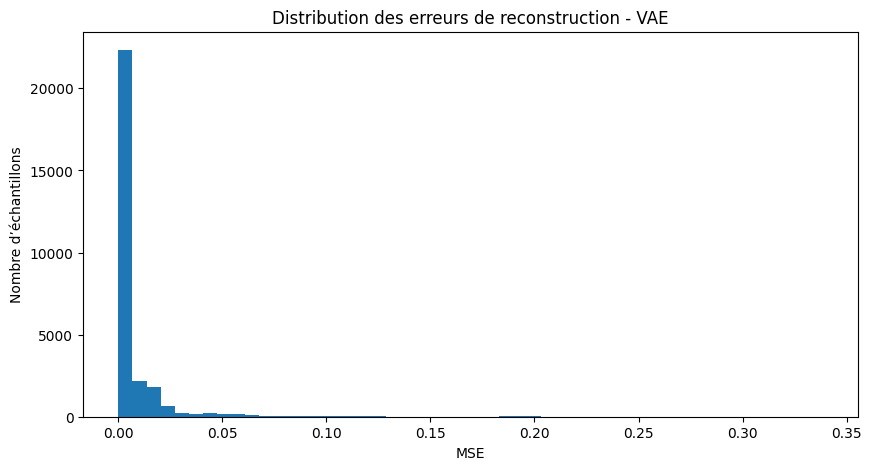

In [99]:
plt.figure(figsize=(10, 5))
plt.hist(mse, bins=50)
plt.title("Distribution des erreurs de reconstruction - VAE")
plt.xlabel("MSE")
plt.ylabel("Nombre d’échantillons")
plt.show()


In [100]:
for percentile in [95, 97, 98, 99,99.5]:
    threshold = np.percentile(train_mse, percentile)
    y_pred = (mse > threshold).astype(int)
    print(f"Threshold at {percentile}%")
    print(confusion_matrix(y_test_seq, y_pred))
    print(classification_report(y_test_seq, y_pred))


Threshold at 95%
[[20238  5517]
 [   77  2617]]
              precision    recall  f1-score   support

         0.0       1.00      0.79      0.88     25755
         1.0       0.32      0.97      0.48      2694

    accuracy                           0.80     28449
   macro avg       0.66      0.88      0.68     28449
weighted avg       0.93      0.80      0.84     28449

Threshold at 97%
[[22032  3723]
 [  189  2505]]
              precision    recall  f1-score   support

         0.0       0.99      0.86      0.92     25755
         1.0       0.40      0.93      0.56      2694

    accuracy                           0.86     28449
   macro avg       0.70      0.89      0.74     28449
weighted avg       0.94      0.86      0.88     28449

Threshold at 98%
[[23682  2073]
 [  378  2316]]
              precision    recall  f1-score   support

         0.0       0.98      0.92      0.95     25755
         1.0       0.53      0.86      0.65      2694

    accuracy                          

In [101]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test_seq, mse)
f1_scores = 2*recall*precision / (recall + precision)
best_threshold = thresholds[np.argmax(f1_scores)]
print("Best threshold based on F1:", best_threshold)


Best threshold based on F1: 0.014566538


In [102]:

threshold = best_threshold
print(f"Seuil de détection choisi : {threshold:.4f}")
y_pred = (mse > threshold).astype(int)

print("Classification Report :")
print(classification_report(y_test_seq, y_pred))

print("Matrice de confusion :")
print(confusion_matrix(y_test_seq, y_pred))

# Optionnel : F1, précision, rappel
f1 = f1_score(y_test_seq, y_pred)
precision = precision_score(y_test_seq, y_pred)
recall = recall_score(y_test_seq, y_pred)

print(f"F1-score: {f1:.4f}")
print(f"Précision: {precision:.4f}")
print(f"Rappel: {recall:.4f}")


Seuil de détection choisi : 0.0146
Classification Report :
              precision    recall  f1-score   support

         0.0       0.98      0.94      0.96     25755
         1.0       0.57      0.82      0.67      2694

    accuracy                           0.93     28449
   macro avg       0.78      0.88      0.82     28449
weighted avg       0.94      0.93      0.93     28449

Matrice de confusion :
[[24120  1635]
 [  498  2196]]
F1-score: 0.6731
Précision: 0.5732
Rappel: 0.8151


## 

## OmniAI

In [207]:
def create_sequences(data, seq_len):
    seqs = []
    for i in range(len(data) - seq_len):
        seqs.append(data[i:i + seq_len])
    return np.array(seqs)

seq_length = 30
X_train_seq = create_sequences(df_train.values, seq_length).astype(np.float32)
X_test_seq = create_sequences(df_test.values, seq_length).astype(np.float32)
y_test_seq = y_test[seq_length:]
df_test_ts_seq = df_test_timestamp[seq_length:].reset_index(drop=True)


In [258]:
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow as tf

class OmniLiteImproved(keras.Model):
    def __init__(self, seq_len, feat_dim, latent_dim=8, hidden_dim=128, beta=0.1):
        super().__init__()
        self.beta = beta
        self.gru_e = keras.Sequential([
            layers.GRU(hidden_dim, return_sequences=True, dropout=0.3),
            layers.LayerNormalization(),
            layers.GRU(hidden_dim, return_sequences=True)
        ])

        self.mean = layers.TimeDistributed(layers.Dense(latent_dim))
        self.log_var = layers.TimeDistributed(layers.Dense(latent_dim))
        self.gru_d = keras.Sequential([
            layers.GRU(hidden_dim, return_sequences=True, dropout=0.3),
            layers.GRU(hidden_dim, return_sequences=True)
        ])
        self.out = layers.TimeDistributed(layers.Dense(feat_dim))

    def call(self, x):
        h = self.gru_e(x)
        mu = self.mean(h)
        log_var = self.log_var(h)
        eps = tf.random.normal(tf.shape(mu))
        z = mu + tf.exp(0.5 * log_var) * eps
        dec = self.gru_d(z)
        recon = self.out(dec)
        recon_loss = tf.reduce_mean(tf.square(x - recon))
        kl = -0.5 * tf.reduce_mean(1 + log_var - mu**2 - tf.exp(log_var))
        self.add_loss(recon_loss + self.beta * kl)
        return recon


In [259]:
model = OmniLiteImproved(seq_len=seq_length, feat_dim=X_train_seq.shape[2], latent_dim=16)
model.compile(optimizer='adam')


In [260]:
model.fit(X_train_seq, X_train_seq, validation_split=0.1, epochs=100, batch_size=64,
          callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)])


Epoch 1/100
401/401 ━━━━━━━━━━━━━━━━━━━━ 20s 24ms/step - loss: 0.0114 - val_loss: 0.0011
Epoch 2/100
401/401 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step - loss: 0.0012 - val_loss: 0.0010
Epoch 3/100
401/401 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step - loss: 0.0011 - val_loss: 0.0012
Epoch 4/100
401/401 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - loss: 0.0011 - val_loss: 0.0011
Epoch 5/100
401/401 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step - loss: 0.0011 - val_loss: 0.0012
Epoch 6/100
401/401 ━━━━━━━━━━━━━━━━━━━━ 8s 19ms/step - loss: 0.0011 - val_loss: 0.0011
Epoch 7/100
401/401 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step - loss: 0.0011 - val_loss: 0.0011
Epoch 8/100
401/401 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step - loss: 0.0011 - val_loss: 0.0010
Epoch 9/100
401/401 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step - loss: 0.0010 - val_loss: 8.5458e-04
Epoch 10/100
401/401 ━━━━━━━━━━━━━━━━━━━━ 8s 19ms/step - loss: 9.7964e-04 - val_loss: 0.0012
Epoch 11/100
401/401 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step - loss: 9.9801e-04 - val_loss: 0.0010
Epoch 12/100
401/

In [261]:
X_pred = model.predict(X_test_seq)
mse = np.mean(np.square(X_test_seq - X_pred), axis=(1,2))


890/890 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step


In [262]:
from sklearn.metrics import precision_recall_curve
p, r, th = precision_recall_curve(y_test_seq, mse)
f1 = 2*p*r/(p+r+1e-8)
best = th[np.argmax(f1)]


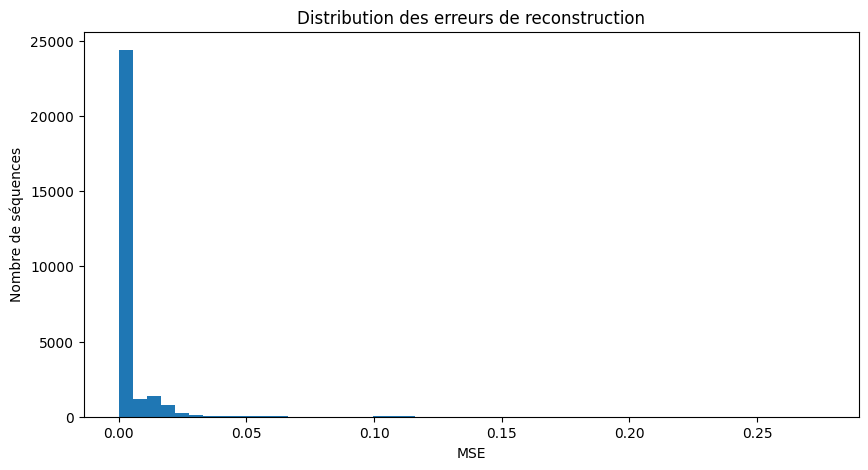

In [263]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.hist(mse, bins=50)
plt.title("Distribution des erreurs de reconstruction")
plt.xlabel("MSE")
plt.ylabel("Nombre de séquences")
plt.show()


In [264]:
print(best)

0.012534561


In [265]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = (mse > best).astype(int) 

# y_test_seq doit correspondre aux labels alignés après création des séquences
print(confusion_matrix(y_test_seq, y_pred))
print(classification_report(y_test_seq, y_pred, digits=4))


[[25106   649]
 [  718  1976]]
              precision    recall  f1-score   support

         0.0     0.9722    0.9748    0.9735     25755
         1.0     0.7528    0.7335    0.7430      2694

    accuracy                         0.9519     28449
   macro avg     0.8625    0.8541    0.8582     28449
weighted avg     0.9514    0.9519    0.9517     28449



In [267]:
from sklearn.metrics import f1_score, precision_score, recall_score, roc_auc_score

f1 = f1_score(y_test_seq, y_pred)
recall = recall_score(y_test_seq, y_pred)
precision = precision_score(y_test_seq, y_pred)
auc = roc_auc_score(y_test_seq, mse)

print(f"F1-score: {f1:.4f}")
print(f"Recall: {recall:.4f}")
print(f"Precision: {precision:.4f}")
print(f"AUC: {auc:.4f}")


F1-score: 0.7430
Recall: 0.7335
Precision: 0.7528
AUC: 0.9519


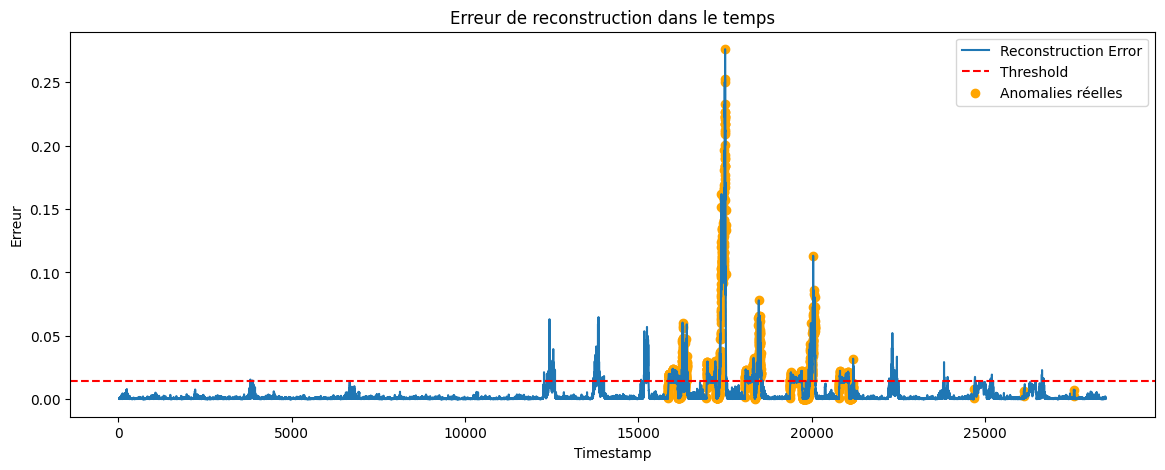

In [268]:
plt.figure(figsize=(14,5))
plt.plot(df_test_ts_seq, mse, label='Reconstruction Error')
plt.axhline(y=threshold, color='red', linestyle='--', label='Threshold')
plt.scatter(df_test_ts_seq[y_test_seq==1], mse[y_test_seq==1], color='orange', label='Anomalies réelles')
plt.legend()
plt.title('Erreur de reconstruction dans le temps')
plt.xlabel('Timestamp')
plt.ylabel('Erreur')
plt.show()


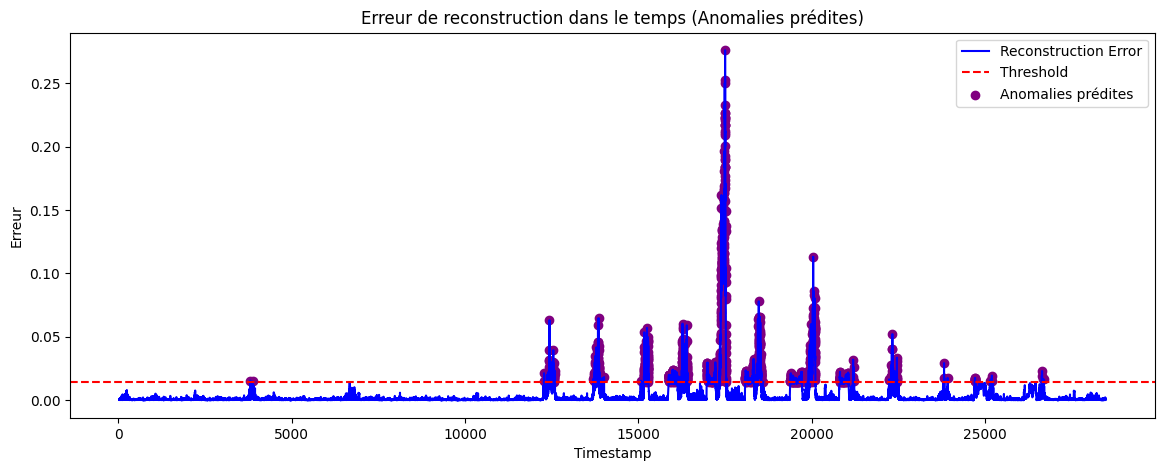

In [269]:
import matplotlib.pyplot as plt

predicted_anomalies_idx = np.where(mse > threshold)[0]

# Création du graphique
plt.figure(figsize=(14, 5))
plt.plot(df_test_ts_seq, mse, label='Reconstruction Error', color='blue')

# Seuil
plt.axhline(y=threshold, color='red', linestyle='--', label='Threshold')

# Affichage des anomalies prédites uniquement
plt.scatter(df_test_ts_seq[predicted_anomalies_idx],
            mse[predicted_anomalies_idx],
            color='purple',
            label='Anomalies prédites')

plt.legend()
plt.title('Erreur de reconstruction dans le temps (Anomalies prédites)')
plt.xlabel('Timestamp')
plt.ylabel('Erreur')
plt.show()
